In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


train= pd.read_csv('train.csv')
train.head()



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [3]:
train.info()
train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

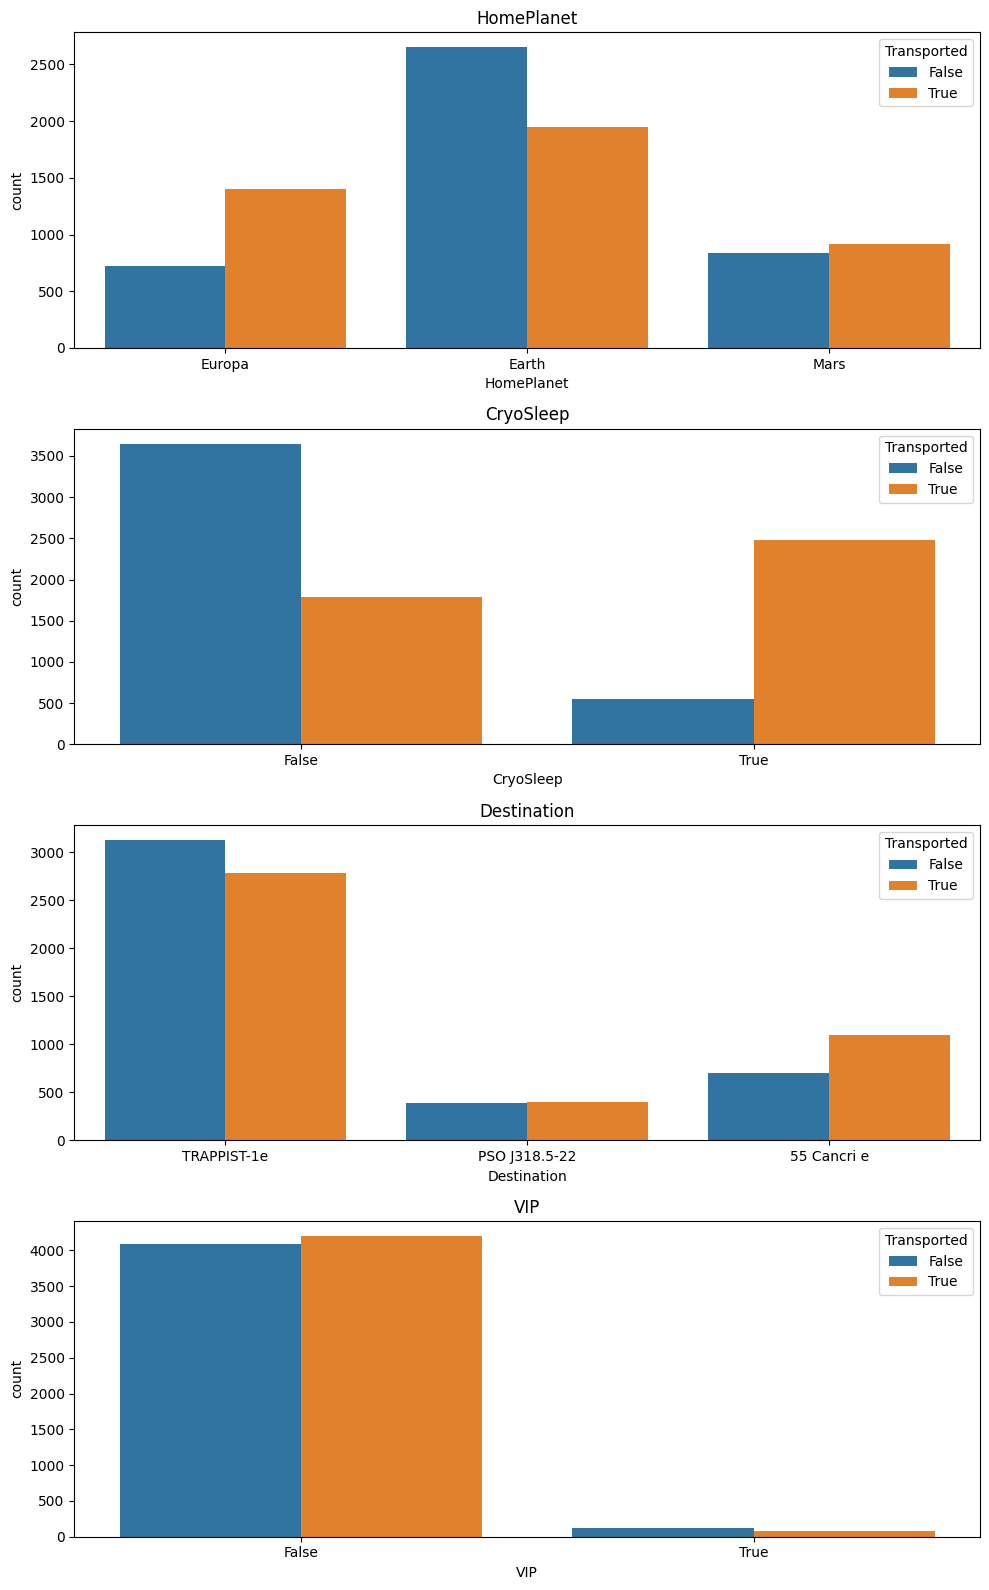

In [4]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [5]:
# Qualitative features
qual_feats=['PassengerId', 'Cabin' ,'Name']

# Preview qualitative features
train[qual_feats].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


FEATURE ENGINEERING - AGE GROUP

Text(0.5, 1.0, 'Age group distribution')

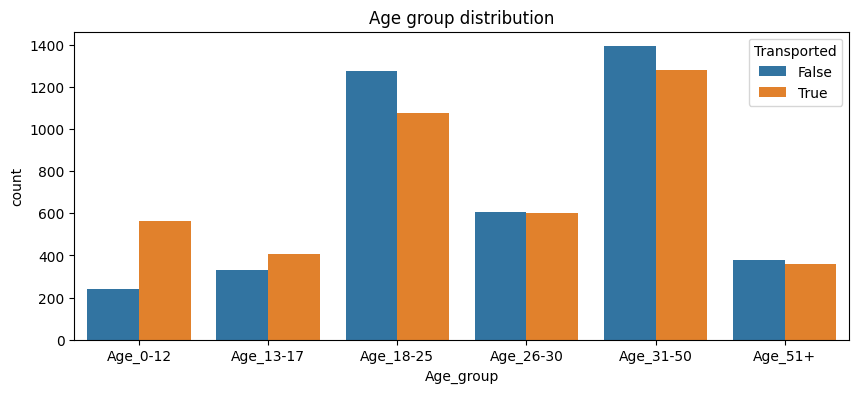

In [6]:
# New features - training set
train['Age_group']=np.nan
train.loc[train['Age']<=12,'Age_group']='Age_0-12'
train.loc[(train['Age']>12) & (train['Age']<18),'Age_group']='Age_13-17'
train.loc[(train['Age']>=18) & (train['Age']<=25),'Age_group']='Age_18-25'
train.loc[(train['Age']>25) & (train['Age']<=30),'Age_group']='Age_26-30'
train.loc[(train['Age']>30) & (train['Age']<=50),'Age_group']='Age_31-50'
train.loc[train['Age']>50,'Age_group']='Age_51+'

# New features - test set
test['Age_group']=np.nan
test.loc[test['Age']<=12,'Age_group']='Age_0-12'
test.loc[(test['Age']>12) & (test['Age']<18),'Age_group']='Age_13-17'
test.loc[(test['Age']>=18) & (test['Age']<=25),'Age_group']='Age_18-25'
test.loc[(test['Age']>25) & (test['Age']<=30),'Age_group']='Age_26-30'
test.loc[(test['Age']>30) & (test['Age']<=50),'Age_group']='Age_31-50'
test.loc[test['Age']>50,'Age_group']='Age_51+'

# Plot distribution of new features
plt.figure(figsize=(10,4))
g=sns.countplot(data=train, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

Spending or no spending engineering

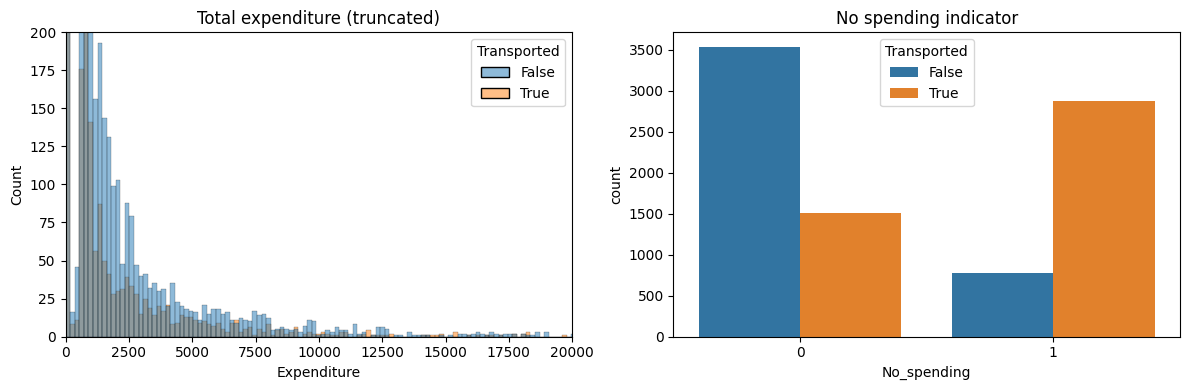

In [7]:
# New features - training set
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train['Expenditure']=train[exp_feats].sum(axis=1)
train['No_spending']=(train['Expenditure']==0).astype(int)

# New features - test set
test['Expenditure']=test[exp_feats].sum(axis=1)
test['No_spending']=(test['Expenditure']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=train, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure (truncated)')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=train, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()

Passenger group size

(0.0, 3000.0)

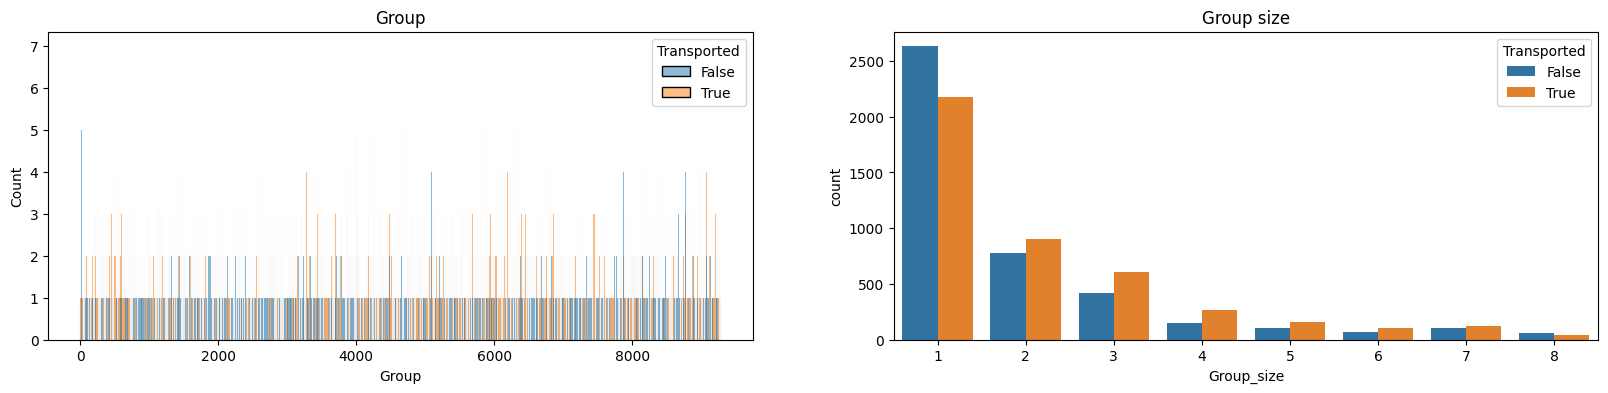

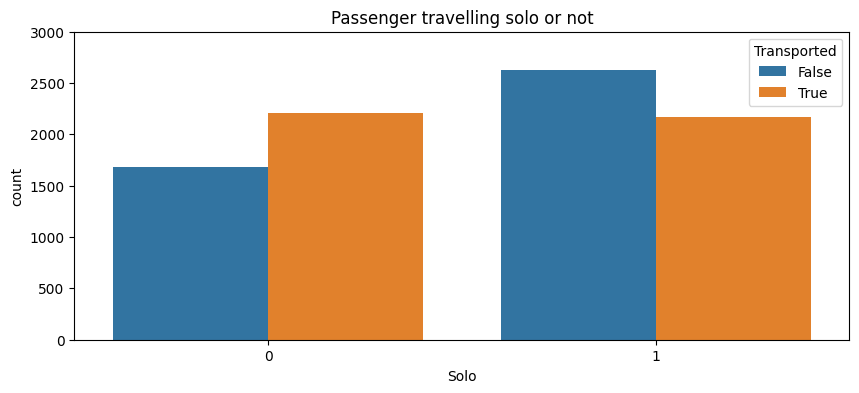

In [8]:
# New feature - Group
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# New feature - Group size
train['Group_size']=train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])
test['Group_size']=test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

# Plot distribution of new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=train, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=train, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

# Only using group size as a feature, using it to determine if a passenger is travelling solo or not
train['Solo']=(train['Group_size']==1).astype(int)
test['Solo']=(test['Group_size']==1).astype(int)

# New feature distribution
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

DECK FEATURE ENGINEERING


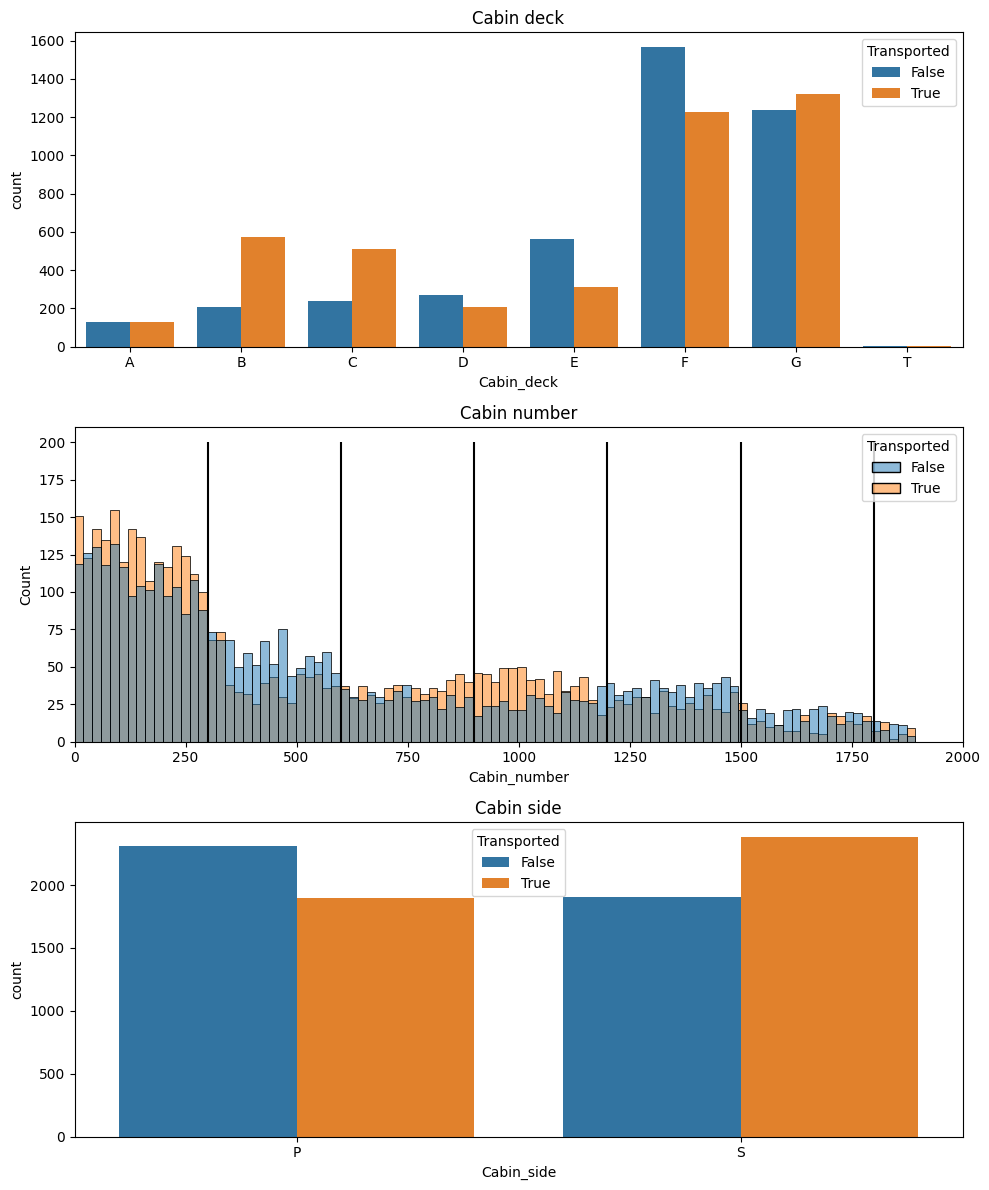

In [9]:
# Replace NaN's with outliers for now (so we can split feature)
train['Cabin'].fillna('Z/9999/Z', inplace=True)
test['Cabin'].fillna('Z/9999/Z', inplace=True)

# New features - training set
train['Cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['Cabin_number'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])

# New features - test set
test['Cabin_deck'] = test['Cabin'].apply(lambda x: x.split('/')[0])
test['Cabin_number'] = test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])

# Put Nan's back in (we will fill these later)
train.loc[train['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train.loc[train['Cabin_number']==9999, 'Cabin_number']=np.nan
train.loc[train['Cabin_side']=='Z', 'Cabin_side']=np.nan
test.loc[test['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
test.loc[test['Cabin_number']==9999, 'Cabin_number']=np.nan
test.loc[test['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Drop Cabin (we don't need it anymore)
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

# Plot distribution of new features
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=train, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

Splitting the cabin into the regions

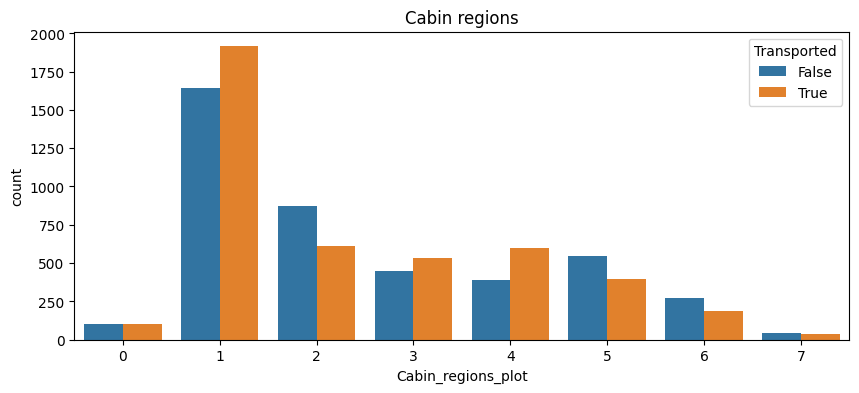

In [10]:
# New features - training set
train['Cabin_region1']=(train['Cabin_number']<300).astype(int)   # one-hot encoding
train['Cabin_region2']=((train['Cabin_number']>=300) & (train['Cabin_number']<600)).astype(int)
train['Cabin_region3']=((train['Cabin_number']>=600) & (train['Cabin_number']<900)).astype(int)
train['Cabin_region4']=((train['Cabin_number']>=900) & (train['Cabin_number']<1200)).astype(int)
train['Cabin_region5']=((train['Cabin_number']>=1200) & (train['Cabin_number']<1500)).astype(int)
train['Cabin_region6']=((train['Cabin_number']>=1500) & (train['Cabin_number']<1800)).astype(int)
train['Cabin_region7']=(train['Cabin_number']>=1800).astype(int)

# New features - test set
test['Cabin_region1']=(test['Cabin_number']<300).astype(int)   # one-hot encoding
test['Cabin_region2']=((test['Cabin_number']>=300) & (test['Cabin_number']<600)).astype(int)
test['Cabin_region3']=((test['Cabin_number']>=600) & (test['Cabin_number']<900)).astype(int)
test['Cabin_region4']=((test['Cabin_number']>=900) & (test['Cabin_number']<1200)).astype(int)
test['Cabin_region5']=((test['Cabin_number']>=1200) & (test['Cabin_number']<1500)).astype(int)
test['Cabin_region6']=((test['Cabin_number']>=1500) & (test['Cabin_number']<1800)).astype(int)
test['Cabin_region7']=(test['Cabin_number']>=1800).astype(int)

# Plot distribution of new features
plt.figure(figsize=(10,4))
train['Cabin_regions_plot']=(train['Cabin_region1']+2*train['Cabin_region2']+3*train['Cabin_region3']+4*train['Cabin_region4']+5*train['Cabin_region5']+6*train['Cabin_region6']+7*train['Cabin_region7']).astype(int)
sns.countplot(data=train, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
train.drop('Cabin_regions_plot', axis=1, inplace=True)

Family size feature

Text(0.5, 1.0, 'Family size')

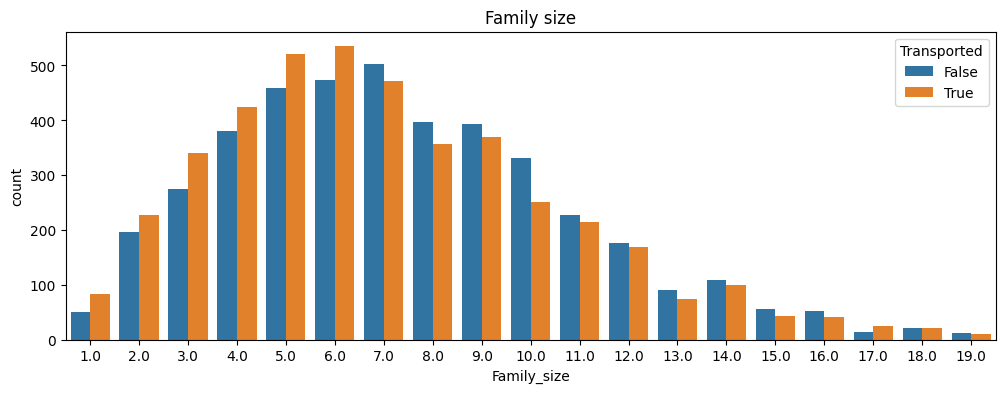

In [11]:
# Replace NaN's with outliers for now (so we can split feature)
train['Name'].fillna('Unknown Unknown', inplace=True)
test['Name'].fillna('Unknown Unknown', inplace=True)

# New feature - Surname
train['Surname']=train['Name'].str.split().str[-1]
test['Surname']=test['Name'].str.split().str[-1]

# New feature - Family size
train['Family_size']=train['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])
test['Family_size']=test['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])

# Put Nan's back in (we will fill these later)
train.loc[train['Surname']=='Unknown','Surname']=np.nan
train.loc[train['Family_size']>100,'Family_size']=np.nan
test.loc[test['Surname']=='Unknown','Surname']=np.nan
test.loc[test['Family_size']>100,'Family_size']=np.nan

# Drop name (we don't need it anymore)
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=train, x='Family_size', hue='Transported')
plt.title('Family size')

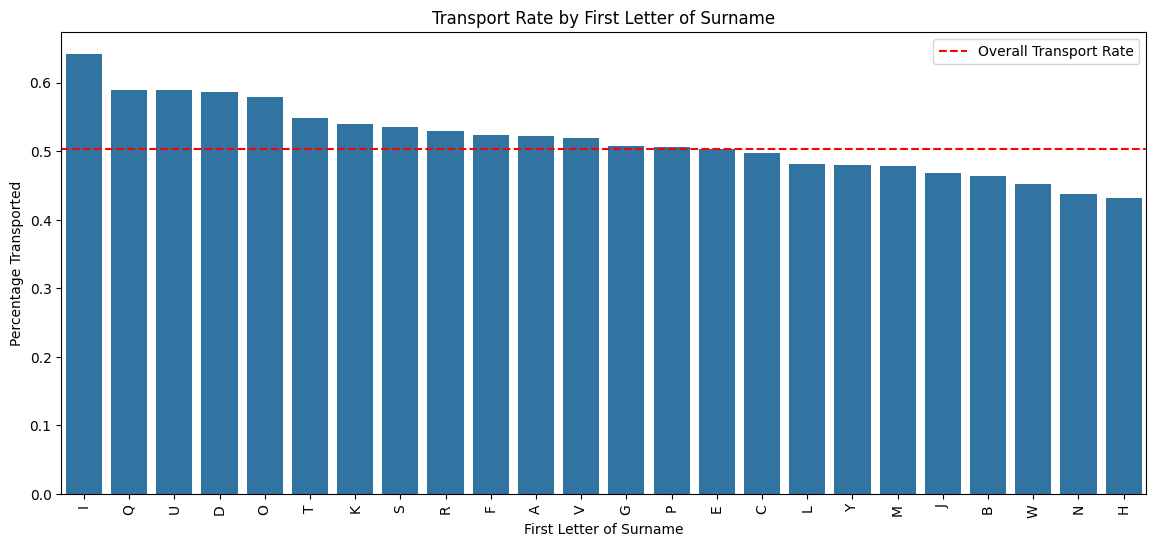

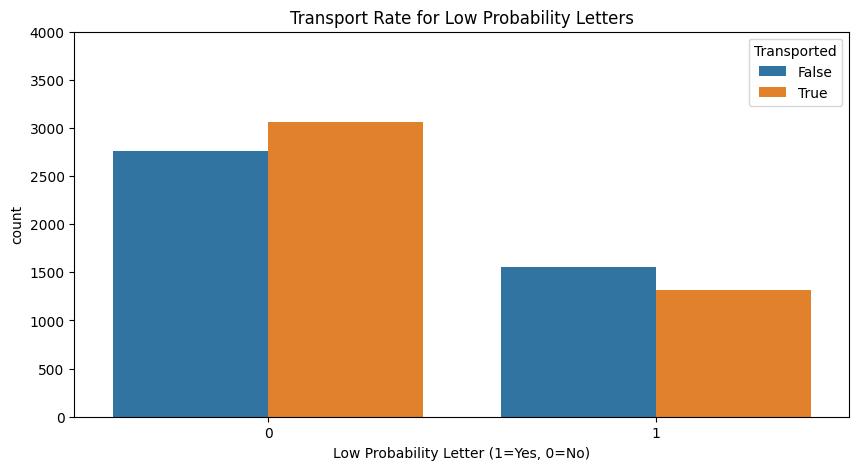

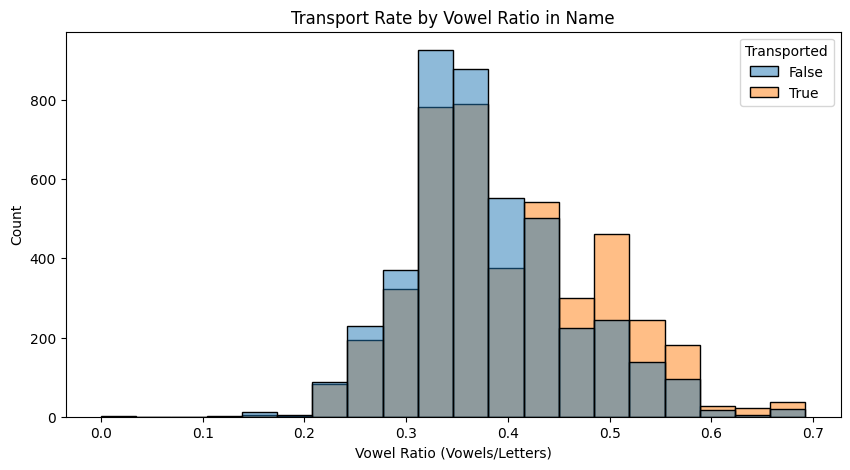

In [12]:
# Extract first letter of surname for analysis
train['First_Letter_Surname'] = train['Surname'].str[0]
test['First_Letter_Surname'] = test['Surname'].str[0]

# Calculate percentage of transported by first letter
transport_rate_by_letter = train.groupby('First_Letter_Surname')['Transported'].mean().reset_index()
transport_rate_by_letter = transport_rate_by_letter.rename(columns={'Transported': 'Transport_Rate'})
transport_rate_by_letter = transport_rate_by_letter.sort_values('Transport_Rate', ascending=False)

# Create a visualization
plt.figure(figsize=(14, 6))
sns.barplot(x='First_Letter_Surname', y='Transport_Rate', data=transport_rate_by_letter)
plt.title('Transport Rate by First Letter of Surname')
plt.xlabel('First Letter of Surname')
plt.ylabel('Percentage Transported')
plt.axhline(train['Transported'].mean(), color='red', linestyle='--', label='Overall Transport Rate')
plt.legend()
plt.xticks(rotation=90)

# Create a feature for high/low transport probability letters
# Define high probability letters (top quartile)
high_prob_letters = transport_rate_by_letter[
    transport_rate_by_letter['Transport_Rate'] > transport_rate_by_letter['Transport_Rate'].quantile(0.75)
]['First_Letter_Surname'].tolist()

# Define low probability letters (bottom quartile)
low_prob_letters = transport_rate_by_letter[
    transport_rate_by_letter['Transport_Rate'] < transport_rate_by_letter['Transport_Rate'].quantile(0.25)
]['First_Letter_Surname'].tolist()

# Create the features
train['High_Prob_Letter'] = train['First_Letter_Surname'].isin(high_prob_letters).astype(int)
train['Low_Prob_Letter'] = train['First_Letter_Surname'].isin(low_prob_letters).astype(int)

test['High_Prob_Letter'] = test['First_Letter_Surname'].isin(high_prob_letters).astype(int)
test['Low_Prob_Letter'] = test['First_Letter_Surname'].isin(low_prob_letters).astype(int)

# Show transport rate for high and low probability groups
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='Low_Prob_Letter', hue='Transported')
plt.title('Transport Rate for Low Probability Letters')
plt.xlabel('Low Probability Letter (1=Yes, 0=No)')
plt.ylim([0, 4000])

# Now let's analyze full names more deeply
# Get first letter of each word in the full name (from HomeWorld + Surname)
train['Full_Name'] = train['HomePlanet'].fillna('') + ' ' + train['Surname'].fillna('')
test['Full_Name'] = test['HomePlanet'].fillna('') + ' ' + test['Surname'].fillna('')

# Count vowels and consonants in full name
def count_letter_types(name):
    vowels = sum(1 for c in name.lower() if c in 'aeiou')
    consonants = sum(1 for c in name.lower() if c in 'bcdfghjklmnpqrstvwxyz')
    return vowels, consonants

train[['Vowels', 'Consonants']] = pd.DataFrame(
    train['Full_Name'].apply(count_letter_types).tolist(), 
    index=train.index
)
test[['Vowels', 'Consonants']] = pd.DataFrame(
    test['Full_Name'].apply(count_letter_types).tolist(), 
    index=test.index
)

# Create ratio of vowels to name length
train['Vowel_Ratio'] = train['Vowels'] / (train['Vowels'] + train['Consonants'])
test['Vowel_Ratio'] = test['Vowels'] / (test['Vowels'] + test['Consonants'])

# Visualize vowel ratio relationship with transport
plt.figure(figsize=(10, 5))
sns.histplot(data=train, x='Vowel_Ratio', hue='Transported', bins=20)
plt.title('Transport Rate by Vowel Ratio in Name')
plt.xlabel('Vowel Ratio (Vowels/Letters)')

# Drop temporary column
train.drop('Full_Name', axis=1, inplace=True)
test.drop('Full_Name', axis=1, inplace=True)

MISSING VALUES

In [13]:
# Labels and features
y=train['Transported'].copy().astype(int)
X=train.drop('Transported', axis=1).copy()

# Concatenate dataframes
data=pd.concat([X, test], axis=0).reset_index(drop=True)

In [14]:
# Columns with missing values
na_cols=data.columns[data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,288,2.22
CryoSleep,310,2.39
Destination,274,2.11
Age,270,2.08
VIP,296,2.28
RoomService,263,2.03
FoodCourt,289,2.23
ShoppingMall,306,2.36
Spa,284,2.19
VRDeck,268,2.07


In [15]:
# Joint distribution of Group and HomePlanet
GHP_gb=data.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
GHP_gb.head()

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0


Text(0.5, 1.0, 'Number of unique home planets per group')

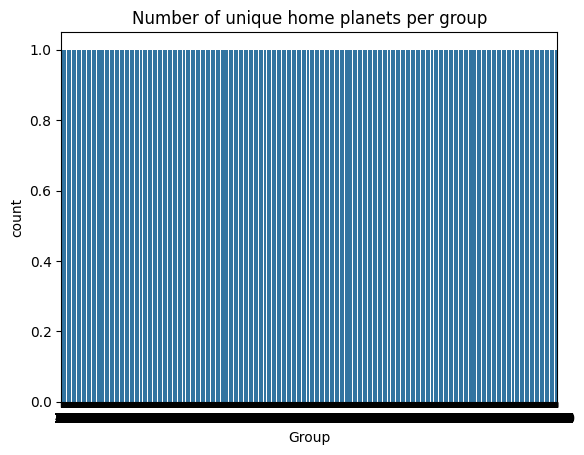

In [16]:
# Countplot of unique values
sns.countplot((GHP_gb>0).sum(axis=1))
plt.title('Number of unique home planets per group')

In [17]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a group with known HomePlanet
GHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index

# Fill corresponding missing values
data.loc[GHP_index,'HomePlanet']=data.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 288
#HomePlanet missing values after: 157


<Axes: xlabel='Cabin_deck', ylabel='HomePlanet'>

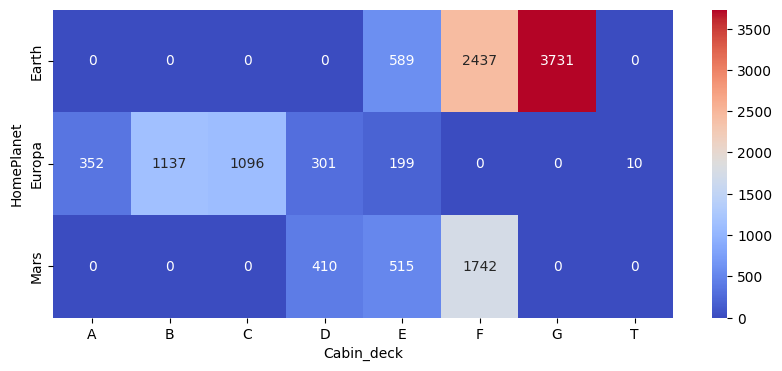

In [18]:
# Joint distribution of CabinDeck and HomePlanet
CDHP_gb=data.groupby(['Cabin_deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')

In [19]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Decks A, B, C or T came from Europa
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

# Deck G came from Earth
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='G'), 'HomePlanet']='Earth'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 157
#HomePlanet missing values after: 94


HomePlanet and Surname



Text(0.5, 1.0, 'Number of unique planets per surname')

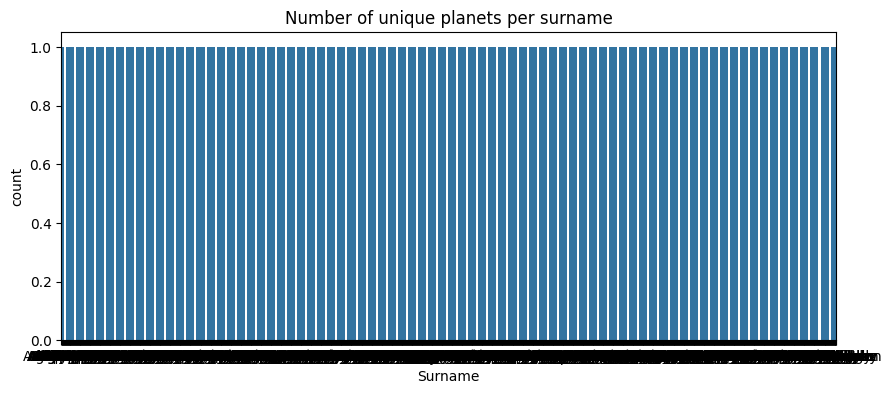

In [20]:
# Joint distribution of Surname and HomePlanet
SHP_gb=data.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Countplot of unique values
plt.figure(figsize=(10,4))
sns.countplot((SHP_gb>0).sum(axis=1))
plt.title('Number of unique planets per surname')

In [21]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a family with known HomePlanet
SHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index

# Fill corresponding missing values
data.loc[SHP_index,'HomePlanet']=data.iloc[SHP_index,:]['Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 94
#HomePlanet missing values after: 10


In [22]:
# Only 10 HomePlanet missing values left - let's look at them
data[data['HomePlanet'].isna()][['PassengerId','HomePlanet','Destination']]

,PassengerId,HomePlanet,Destination
2274,2443_01,NaN,TRAPPIST-1e
2631,2817_01,NaN,TRAPPIST-1e
3091,3331_01,NaN,TRAPPIST-1e
4548,4840_01,NaN,TRAPPIST-1e
5762,6108_01,NaN,TRAPPIST-1e
8969,0616_01,NaN,TRAPPIST-1e
10583,4052_01,NaN,TRAPPIST-1e
11913,7065_01,NaN,TRAPPIST-1e
12551,8435_01,NaN,TRAPPIST-1e
12725,8775_01,NaN,TRAPPIST-1e


<Axes: xlabel='HomePlanet', ylabel='Destination'>

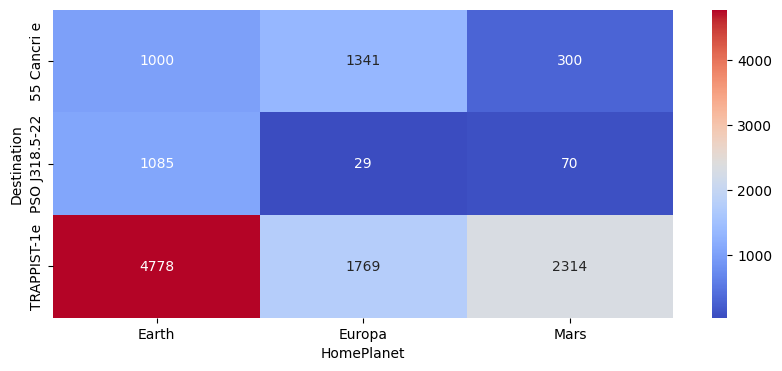

In [23]:
# Joint distribution of HomePlanet and Destination
HPD_gb=data.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')

In [24]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
data.loc[(data['HomePlanet'].isna()) & ~(data['Cabin_deck']=='D'), 'HomePlanet']='Earth'
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 10
#HomePlanet missing values after: 0


In [25]:
# Missing values before
D_bef=data['Destination'].isna().sum()

# Fill missing Destination values with mode
data.loc[(data['Destination'].isna()), 'Destination']='TRAPPIST-1e'

# Print number of missing values left
print('#Destination missing values before:',D_bef)
print('#Destination missing values after:',data['Destination'].isna().sum())

#Destination missing values before: 274
#Destination missing values after: 0


In [26]:
data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].median().unstack().fillna(0)


Cabin_deck                      A     B     C     D     E     F     G     T
HomePlanet No_spending Solo                                                
Earth      0           0      0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                       1      0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           1           0      0.0   0.0   0.0   0.0   7.0  15.0   9.0   0.0
                       1      0.0   0.0   0.0   0.0  21.0  25.0  23.0   0.0
Europa     0           0     34.5  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                       1     35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           1           0     30.0  27.0  28.0  27.0  28.0   0.0   0.0   0.0
                       1     37.5  34.0  34.5  31.0  33.0   0.0   0.0   0.0
Mars       0           0      0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                       1      0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           1           0      0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                       1      0.0   0.0   0.0  33.0  30.0  29.0   0.0   0.0

In [27]:
data.groupby(['No_spending','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)


CryoSleep,False,True
No_spending,,
0,7339.0,0.0
1,740.0,4581.0


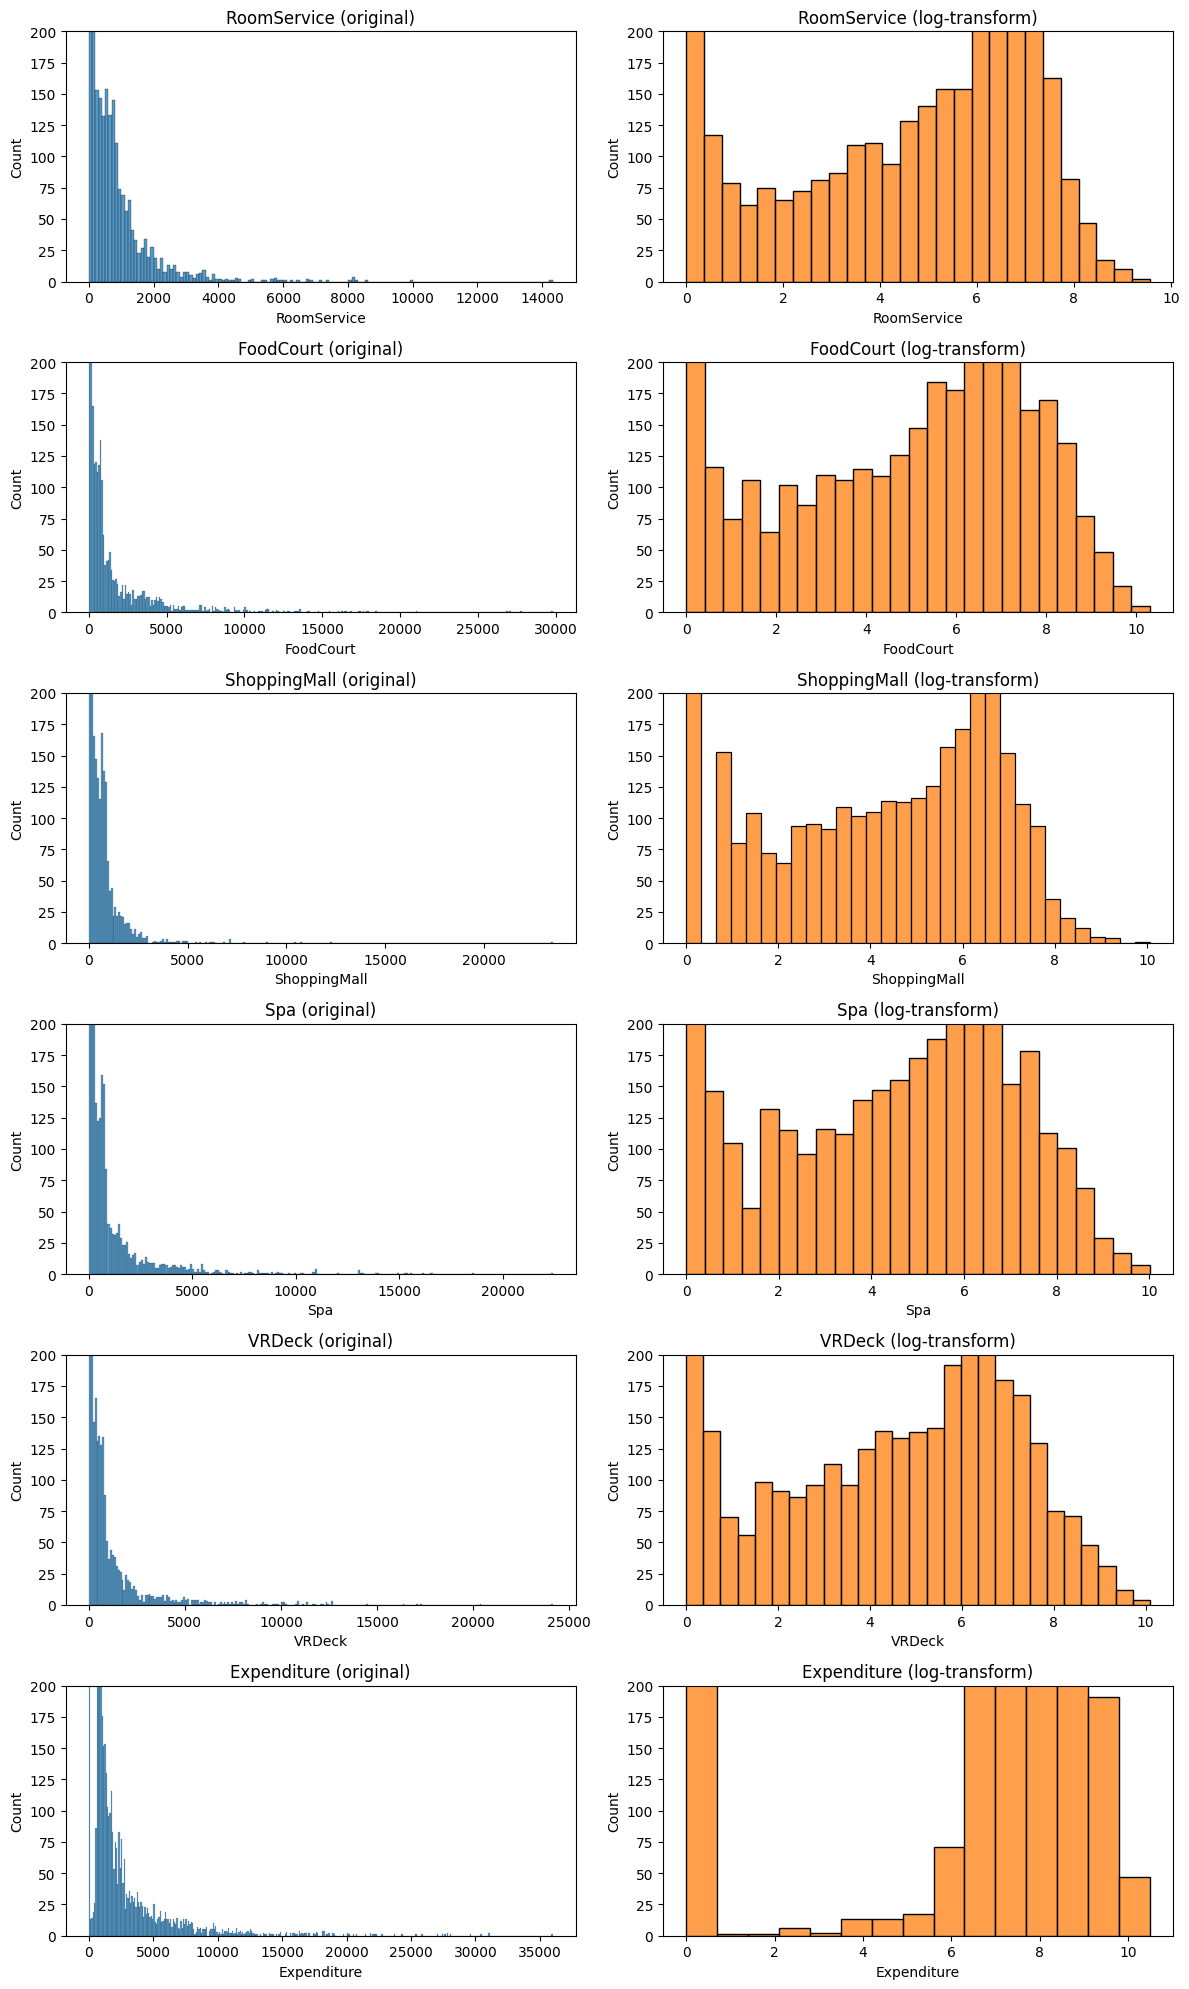

In [28]:
# Train and test
X=data[data['PassengerId'].isin(train['PassengerId'].values)].copy()
X_test=data[data['PassengerId'].isin(test['PassengerId'].values)].copy()
X.drop(['PassengerId', 'Group', 'Group_size', 'Age_group', 'Cabin_number'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Group', 'Group_size', 'Age_group', 'Cabin_number'], axis=1, inplace=True)

# Plot log transform results
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(X[col], binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+X[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

In [29]:
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']:
    X[col]=np.log(1+X[col])
    X_test[col]=np.log(1+X_test[col])

In [30]:
# Identify numerical and categorical columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Fixed import
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Identify column types
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Scale numerical data to have mean=0 and variance=1
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough')

# Apply preprocessing
X = ct.fit_transform(X)
X_test = ct.transform(X_test)

# Print new shape
print('Training set shape:', X.shape)
print('Test set shape:', X_test.shape)

# Check for any NaN values after transformation

print('NaN values in training set:', np.isnan(X).any())
print('NaN values in test set:', np.isnan(X_test).any())

Training set shape: (8693, 2289)
Test set shape: (4277, 2289)
NaN values in training set: True
NaN values in test set: True


c:\Users\46762\VSCODE\AI_kurs\grupp_uppgift_2\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


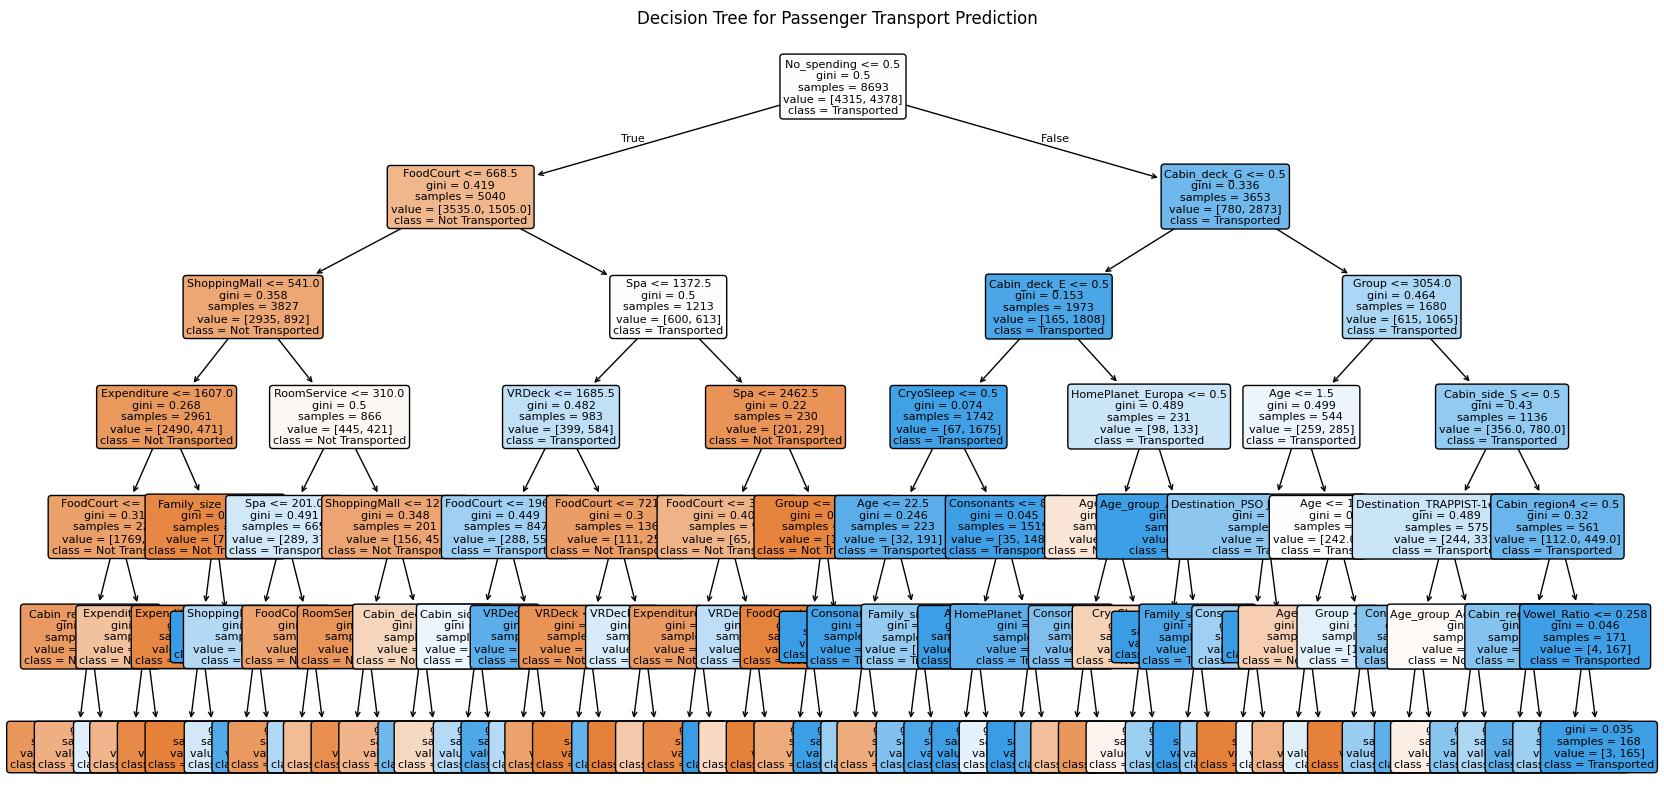

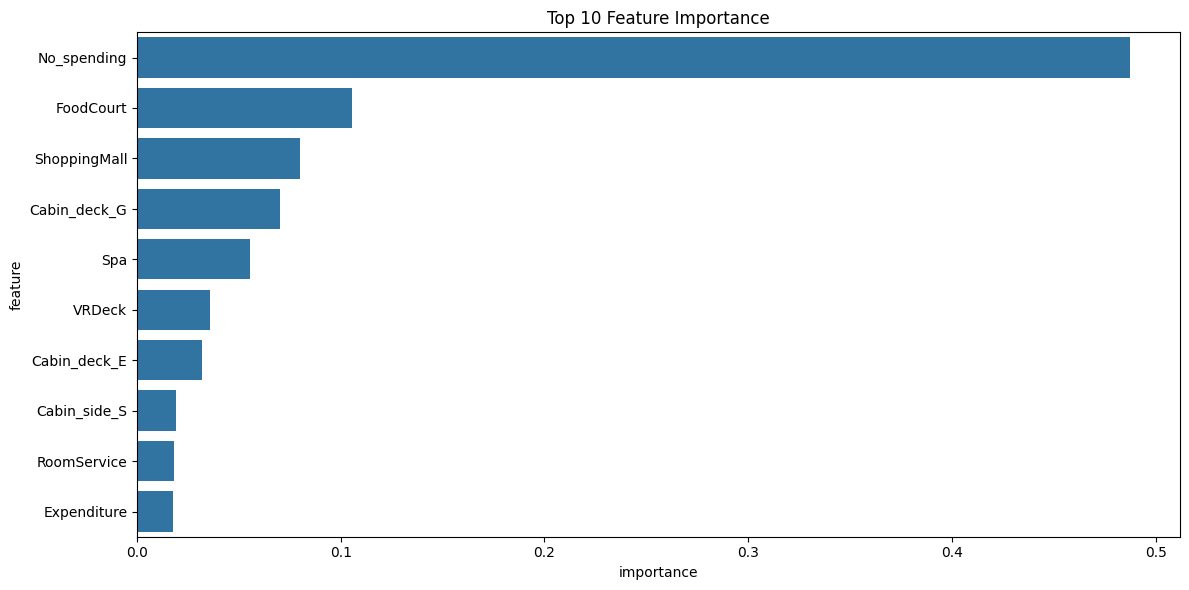


Training Set Performance:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      4315
           1       0.80      0.81      0.81      4378

    accuracy                           0.80      8693
   macro avg       0.80      0.80      0.80      8693
weighted avg       0.80      0.80      0.80      8693



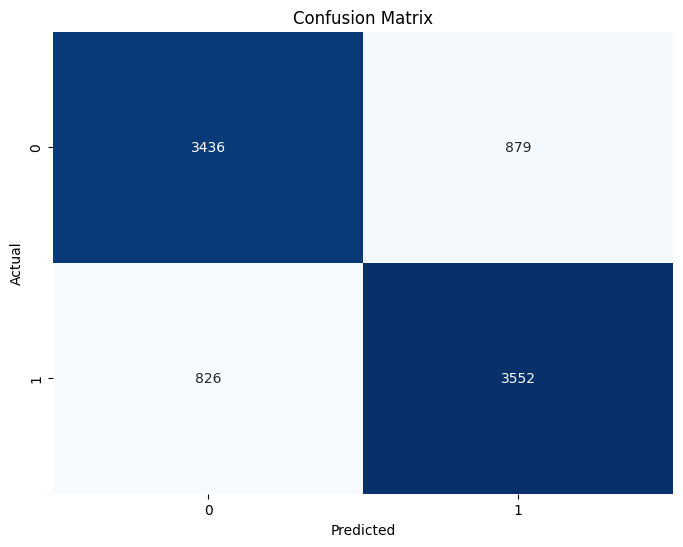

Submission file created!


In [31]:
# Let's create and train a decision tree model

# First, let's handle any remaining missing values
for col in data.columns:
    if data[col].isna().any():
        # For numeric columns, fill with median
        if data[col].dtype in ['float64', 'int64']:
            data[col].fillna(data[col].median(), inplace=True)
        # For categorical columns, fill with mode
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)

# Split the data back into training and test sets
X_train = data.iloc[:len(y)].drop(['PassengerId', 'Surname', 'First_Letter_Surname'], axis=1)
X_test = data.iloc[len(y):].drop(['PassengerId', 'Surname', 'First_Letter_Surname'], axis=1)

# Convert categorical variables to one-hot encoding
cat_cols = X_train.select_dtypes(include=['object']).columns
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Make sure train and test have the same columns
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0
X_test = X_test[X_train.columns]

# Now let's create and train the decision tree
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model.fit(X_train, y)

# Let's visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['Not Transported', 'Transported'], 
          filled=True, rounded=True, fontsize=8)
plt.title('Decision Tree for Passenger Transport Prediction')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

# Evaluate the model
y_pred = dt_model.predict(X_train)
print("\nTraining Set Performance:")
print(classification_report(y, y_pred))

# Confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# If you want to output predictions for the test set
test_predictions = dt_model.predict(X_test)
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': test_predictions.astype(bool)
})
submission.to_csv('submission.csv', index=False)
print("Submission file created!")

Training XGBoost model with hyperparameter tuning...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\46762\VSCODE\AI_kurs\grupp_uppgift_2\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:30:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 150, 'reg_alpha': 0.5, 'reg_lambda': 5.0, 'subsample': 0.9}
Best cross-validation accuracy: 0.8135
XGBoost Training Accuracy: 0.8667
XGBoost Training AUC: 0.9450


<Figure size 1400x800 with 0 Axes>

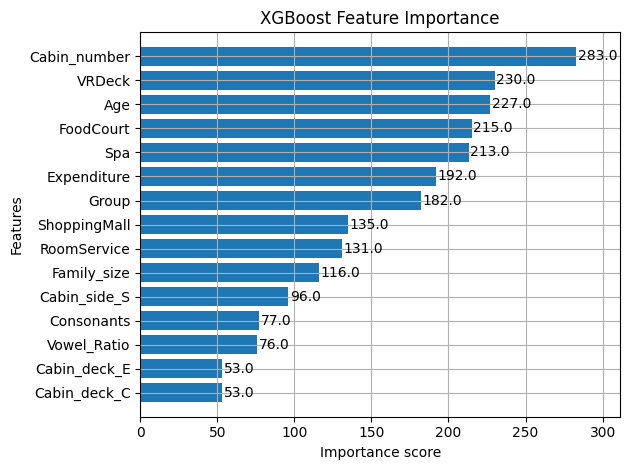

XGBoost tuned submission file created!
Top features by importance:
              feature  importance
9         No_spending    0.660325
41       Cabin_deck_G    0.057053
0           CryoSleep    0.056195
39       Cabin_deck_E    0.015687
17      Cabin_region4    0.014677
27  HomePlanet_Europa    0.014064
8         Expenditure    0.013890
4           FoodCourt    0.011400
6                 Spa    0.010664
5        ShoppingMall    0.010398
7              VRDeck    0.010324
16      Cabin_region3    0.009654
43       Cabin_side_S    0.009628
3         RoomService    0.009517
28    HomePlanet_Mars    0.008715

Training model on reduced feature set (15 features)...
XGBoost Reduced Model Training Accuracy: 0.8324
XGBoost Reduced Model Training AUC: 0.9252


In [32]:
# Import libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer

print("Training XGBoost model with hyperparameter tuning...")

# Define the hyperparameter search space
param_grid = {
    'max_depth': [5],           # Reduced max depth options
    'learning_rate': [0.1], # Smaller learning rates
    'n_estimators': [ 150],  
    'reg_alpha': [ 0.5],  # L1 regularization
    'reg_lambda': [ 5.0],    # L2 regularization
    'subsample': [0.9],
    'colsample_bytree': [0.9],
    'min_child_weight': [ 5]
}


xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    reg_alpha=0.1,        # L1 regularization - try values from 0.01 to 1.0
    reg_lambda=1.0,       # L2 regularization - try values from 0.1 to 5.0
    max_depth=4,          # Reduce from your current value
    min_child_weight=3,   # Increase to make model more conservative
    subsample=0.8,        # Use 80% of data per tree
    colsample_bytree=0.8, # Use 80% of features per tree
    seed=42
)

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create scorers
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score)
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring=scorers,
    refit='accuracy',  # We'll optimize for accuracy
    cv=cv,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Perform the grid search
grid_search.fit(X_train, y)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

# Get the best model
xgb_model = grid_search.best_estimator_

# Make predictions with the best model
xgb_pred = xgb_model.predict(X_train)
xgb_pred_proba = xgb_model.predict_proba(X_train)[:, 1]

# Evaluate the model
train_accuracy = accuracy_score(y, xgb_pred)
train_auc = roc_auc_score(y, xgb_pred_proba)
print(f"XGBoost Training Accuracy: {train_accuracy:.4f}")
print(f"XGBoost Training AUC: {train_auc:.4f}")

# Plot feature importance
plt.figure(figsize=(14, 8))
xgb.plot_importance(xgb_model, max_num_features=15, height=0.8)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

# Make predictions on the test set
xgb_test_pred = xgb_model.predict(X_test)
xgb_test_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Create submission file
submission_xgb = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': xgb_test_pred.astype(bool)
})

# Save submission file
submission_xgb.to_csv('submission_xgb_tuned.csv', index=False)
print("XGBoost tuned submission file created!")

# After training your model, identify important features
importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"Top features by importance:")
print(importance.head(15))

# Keep only top N features
top_n = 15  # Adjust based on your dataset
top_features = importance.head(top_n)['feature'].values
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

print(f"\nTraining model on reduced feature set ({top_n} features)...")

# Train a new model on the reduced feature set
xgb_reduced = xgb.XGBClassifier(**best_params)
xgb_reduced.fit(X_train_reduced, y)

# Evaluate the reduced model
reduced_pred = xgb_reduced.predict(X_train_reduced)
reduced_pred_proba = xgb_reduced.predict_proba(X_train_reduced)[:, 1]
reduced_accuracy = accuracy_score(y, reduced_pred)
reduced_auc = roc_auc_score(y, reduced_pred_proba)

print(f"XGBoost Reduced Model Training Accuracy: {reduced_accuracy:.4f}")
print(f"XGBoost Reduced Model Training AUC: {reduced_auc:.4f}")




Training and evaluating models...

Random Forest:
  Cross-validation accuracy: 0.7891 ± 0.0052
  Training accuracy: 0.8185
  Overfitting gap: 0.0293
  Training time: 1.27 seconds

XGBoost:
  Cross-validation accuracy: 0.8046 ± 0.0072
  Training accuracy: 0.8182
  Overfitting gap: 0.0137
  Training time: 0.73 seconds

Logistic Regression:
  Cross-validation accuracy: 0.7934 ± 0.0065
  Training accuracy: 0.7966
  Overfitting gap: 0.0032
  Training time: 0.41 seconds

Ensemble:
  Cross-validation accuracy: 0.8006 ± 0.0065
  Training accuracy: 0.8134
  Overfitting gap: 0.0128
  Training time: 5.26 seconds
Calculating learning curve for Random Forest...
Calculating learning curve for XGBoost...
Calculating learning curve for Logistic Regression...
Calculating learning curve for Ensemble...


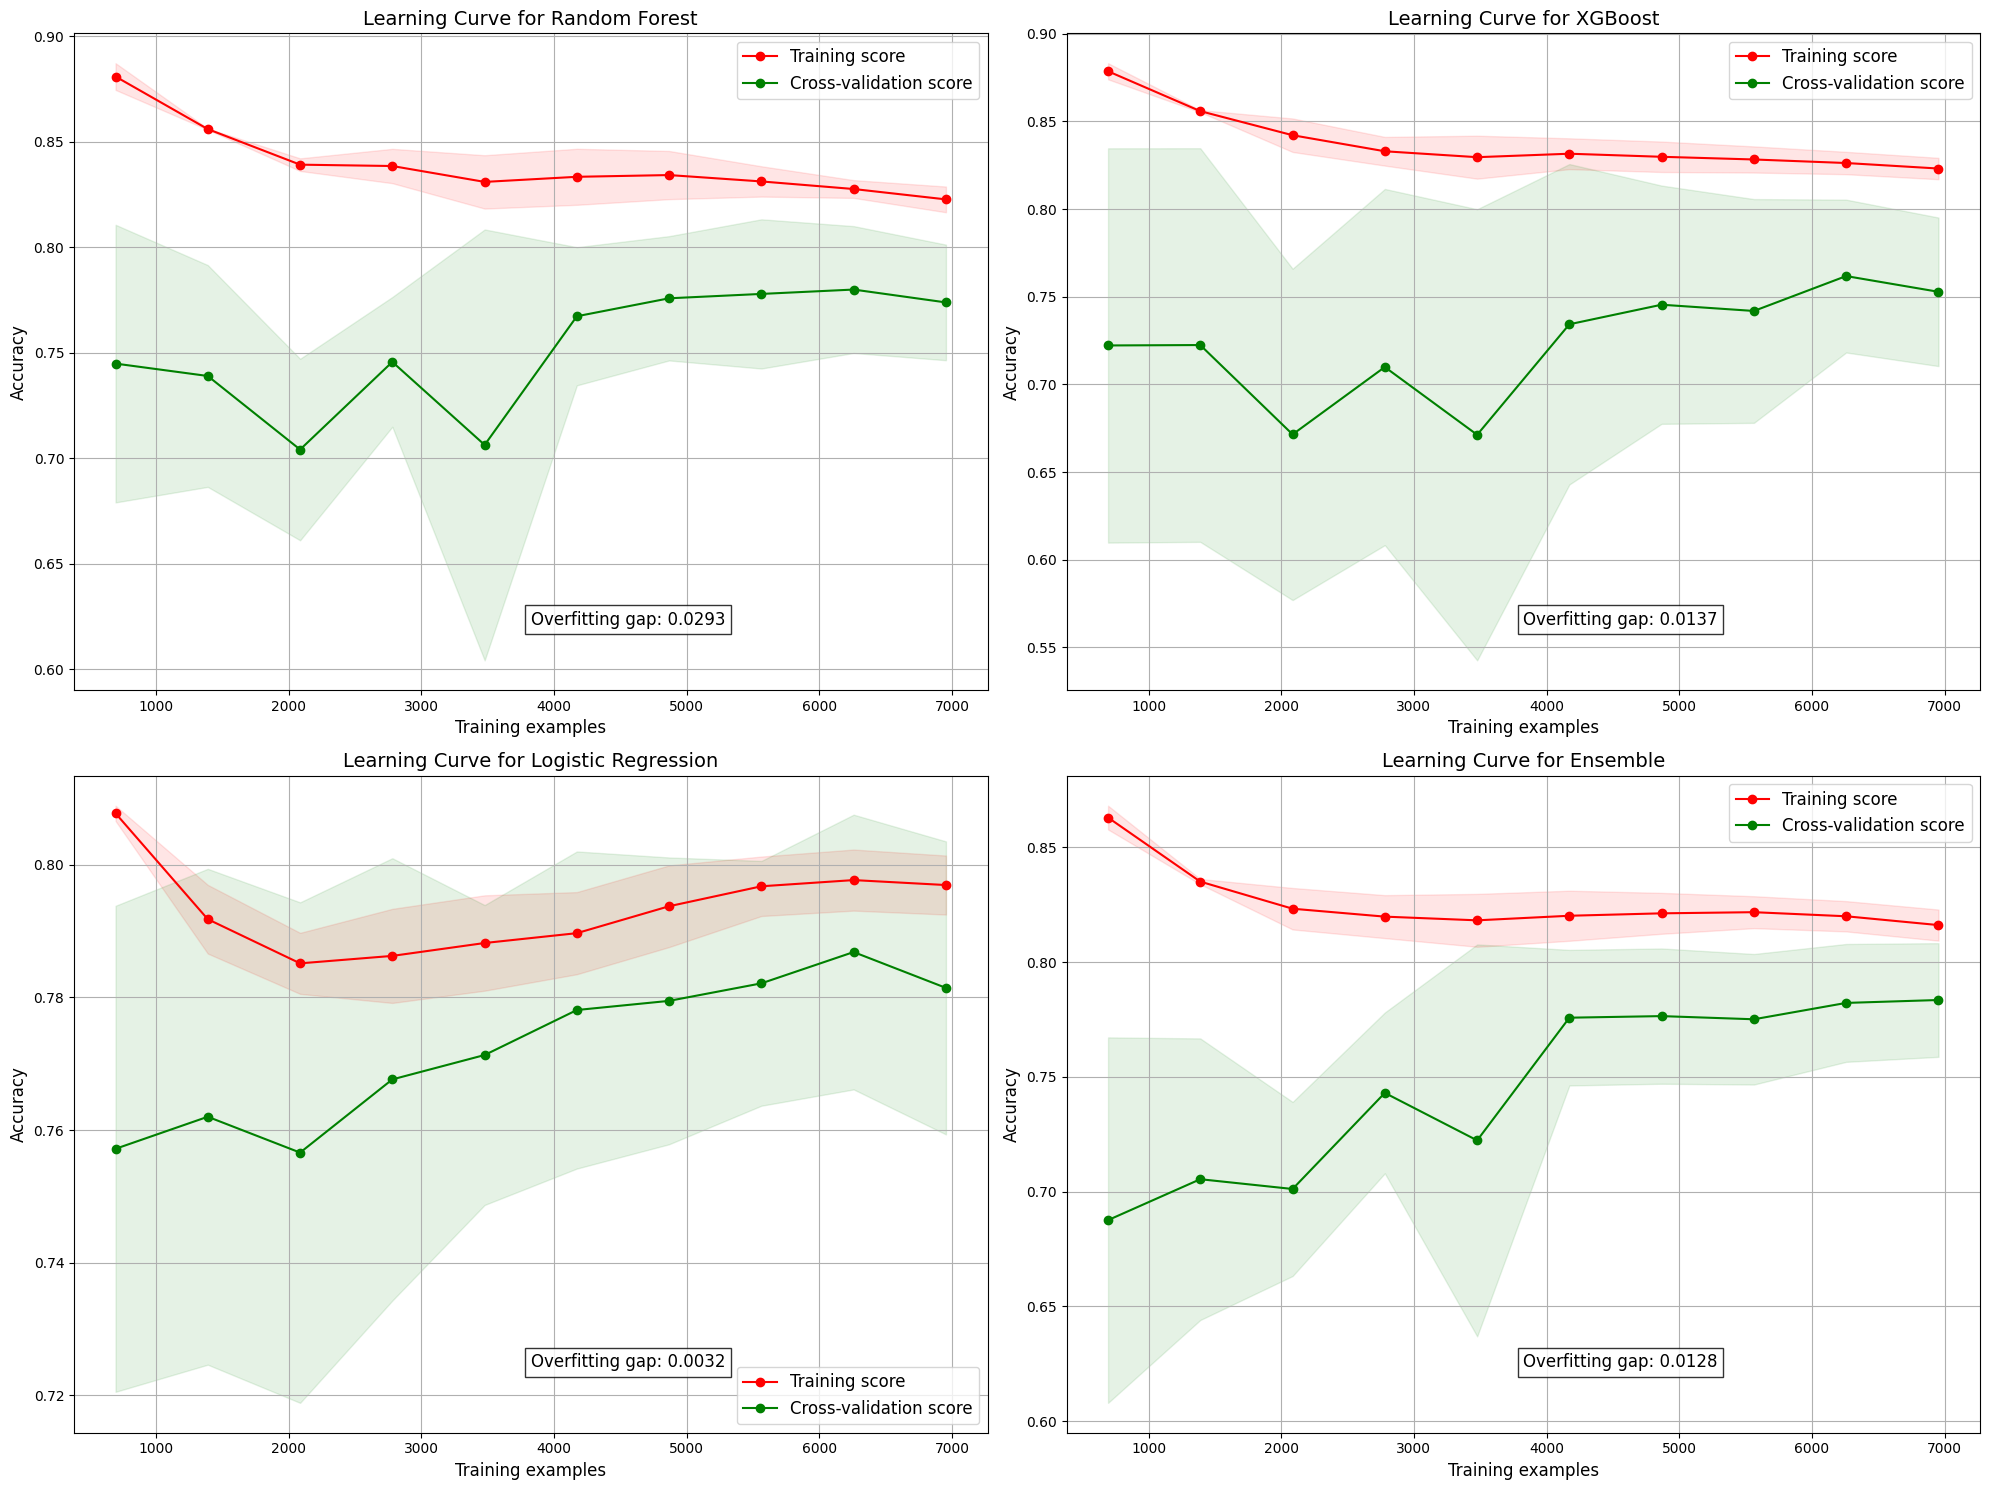


Model Performance Summary:
                 Model  CV Accuracy  Train Accuracy  Overfitting Gap  \
0              XGBoost     0.804555        0.818245         0.013690   
1             Ensemble     0.800644        0.813413         0.012769   
2  Logistic Regression     0.793396        0.796618         0.003222   
3        Random Forest     0.789140        0.818475         0.029334   

   Training Time (s)  
0           0.730057  
1           5.254429  
2           0.405248  
3           1.269478  

Best model: XGBoost
Submission file created using XGBoost!


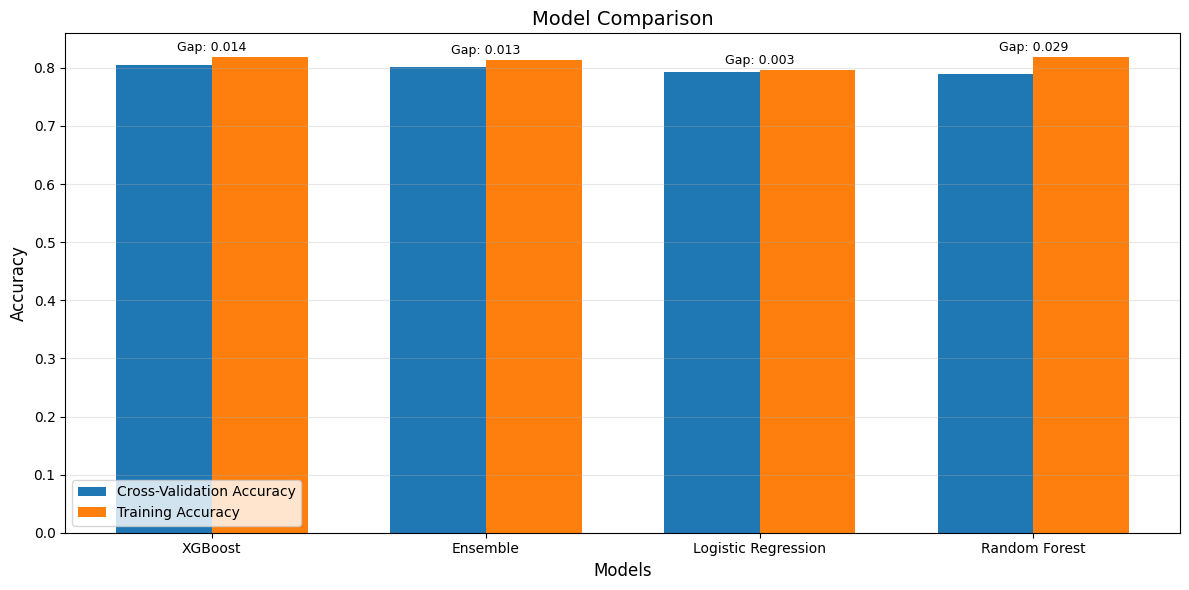

In [33]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import learning_curve, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

# Function to plot learning curves for a model
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring="accuracy"
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    return train_sizes, train_mean, train_std, test_mean, test_std

# Create a standardized version of the training data for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models with regularization to prevent overfitting
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=4,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    max_depth=4,
    learning_rate=0.05,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=1.0,
    min_child_weight=3,
    random_state=42
)

lr_model = LogisticRegression(
    C=0.1,  # Stronger regularization
    penalty='l2',
    solver='liblinear',
    random_state=42,
    max_iter=1000
)

# Create an ensemble model (voting classifier)
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lr', LogisticRegression(C=0.1, max_iter=1000, random_state=42))
    ],
    voting='soft'  # Use probability estimates for voting
)

# Dictionary to store our models
models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Logistic Regression': lr_model,
    'Ensemble': ensemble_model
}

# Dictionary to store results
results = {}

print("Training and evaluating models...")
for name, model in models.items():
    start_time = time.time()
    
    # For logistic regression, use scaled data
    X_use = X_train_scaled if name == 'Logistic Regression' else X_train
    
    # Calculate cross-validation scores
    cv_scores = cross_val_score(model, X_use, y, cv=cv, scoring='accuracy')
    
    # Fit model on full training data
    model.fit(X_use, y)
    
    # Training predictions
    train_preds = model.predict(X_use)
    
    # Calculate metrics
    train_acc = accuracy_score(y, train_preds)
    
    # Store results
    results[name] = {
        'cv_acc_mean': np.mean(cv_scores),
        'cv_acc_std': np.std(cv_scores),
        'train_acc': train_acc,
        'overfitting_gap': train_acc - np.mean(cv_scores),
        'training_time': time.time() - start_time
    }
    
    print(f"\n{name}:")
    print(f"  Cross-validation accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    print(f"  Training accuracy: {train_acc:.4f}")
    print(f"  Overfitting gap: {train_acc - np.mean(cv_scores):.4f}")
    print(f"  Training time: {time.time() - start_time:.2f} seconds")

# Calculate learning curves for each model and store
learning_curves = {}
for name, model in models.items():
    print(f"Calculating learning curve for {name}...")
    X_use = X_train_scaled if name == 'Logistic Regression' else X_train
    curves = plot_learning_curve(model, X_use, y, name)
    learning_curves[name] = curves

# Plot learning curves for all models
plt.figure(figsize=(20, 15))

for i, (name, model) in enumerate(models.items()):
    plt.subplot(2, 2, i+1)
    
    train_sizes, train_mean, train_std, test_mean, test_std = learning_curves[name]
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.title(f"Learning Curve for {name}", fontsize=14)
    plt.xlabel("Training examples", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.grid(True)
    plt.legend(loc="best", fontsize=12)
    
    # Add text about overfitting gap
    gap = results[name]['overfitting_gap']
    plt.text(0.5, 0.1, f"Overfitting gap: {gap:.4f}", 
             transform=plt.gca().transAxes, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Create a summary comparison table
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'CV Accuracy': [results[m]['cv_acc_mean'] for m in results],
    'Train Accuracy': [results[m]['train_acc'] for m in results],
    'Overfitting Gap': [results[m]['overfitting_gap'] for m in results],
    'Training Time (s)': [results[m]['training_time'] for m in results]
})

# Sort by CV accuracy descending
results_df = results_df.sort_values('CV Accuracy', ascending=False).reset_index(drop=True)

# Display the table
print("\nModel Performance Summary:")
print(results_df)

# Choose the best model (highest CV accuracy)
best_model_name = results_df.iloc[0]['Model']
print(f"\nBest model: {best_model_name}")

# Use the best model for final predictions
best_model = models[best_model_name]
X_use_test = X_test
if best_model_name == 'Logistic Regression':
    X_use_test = scaler.transform(X_test)

# Generate predictions for the test set
test_predictions = best_model.predict(X_use_test)
submission_final = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': test_predictions.astype(bool)
})

# Save the predictions
submission_final.to_csv(f'submission_{best_model_name.replace(" ", "_").lower()}.csv', index=False)
print(f"Submission file created using {best_model_name}!")

# Bar plot comparing model performance
plt.figure(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.35

plt.bar(x - width/2, results_df['CV Accuracy'], width, label='Cross-Validation Accuracy')
plt.bar(x + width/2, results_df['Train Accuracy'], width, label='Training Accuracy')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Comparison', fontsize=14)
plt.xticks(x, results_df['Model'])
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add text annotations for overfitting gap
for i, row in results_df.iterrows():
    plt.text(i, row['Train Accuracy'] + 0.01, 
             f"Gap: {row['Overfitting Gap']:.3f}", 
             ha='center', fontsize=9)

plt.tight_layout()
plt.show() 

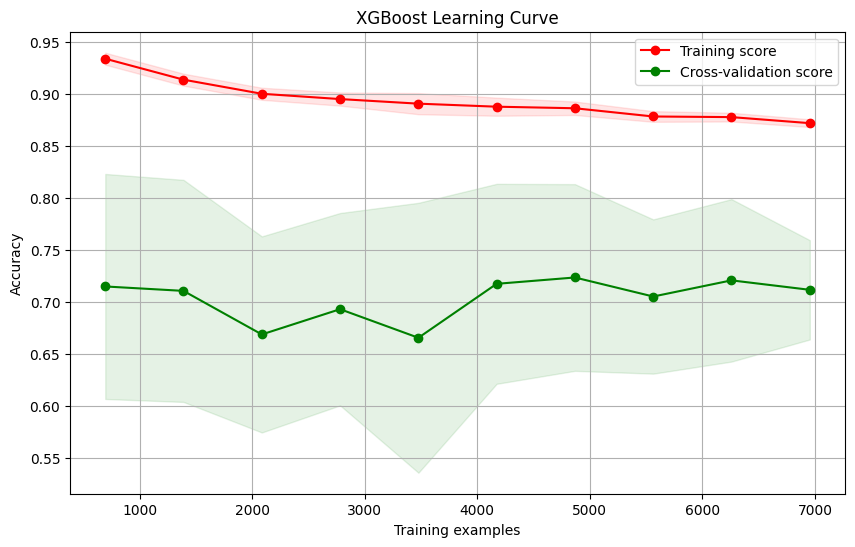

In [34]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring="accuracy"
    )
    
    # Calculate mean and std for training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.grid()
    
    plt.fill_between(train_sizes, train_mean - train_std, 
                      train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std,
                      test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()

# Create a new model with the best parameters found via grid search
best_model = xgb.XGBClassifier(**best_params, objective='binary:logistic', eval_metric='logloss')
plot_learning_curve(best_model, X_train, y, "XGBoost Learning Curve")

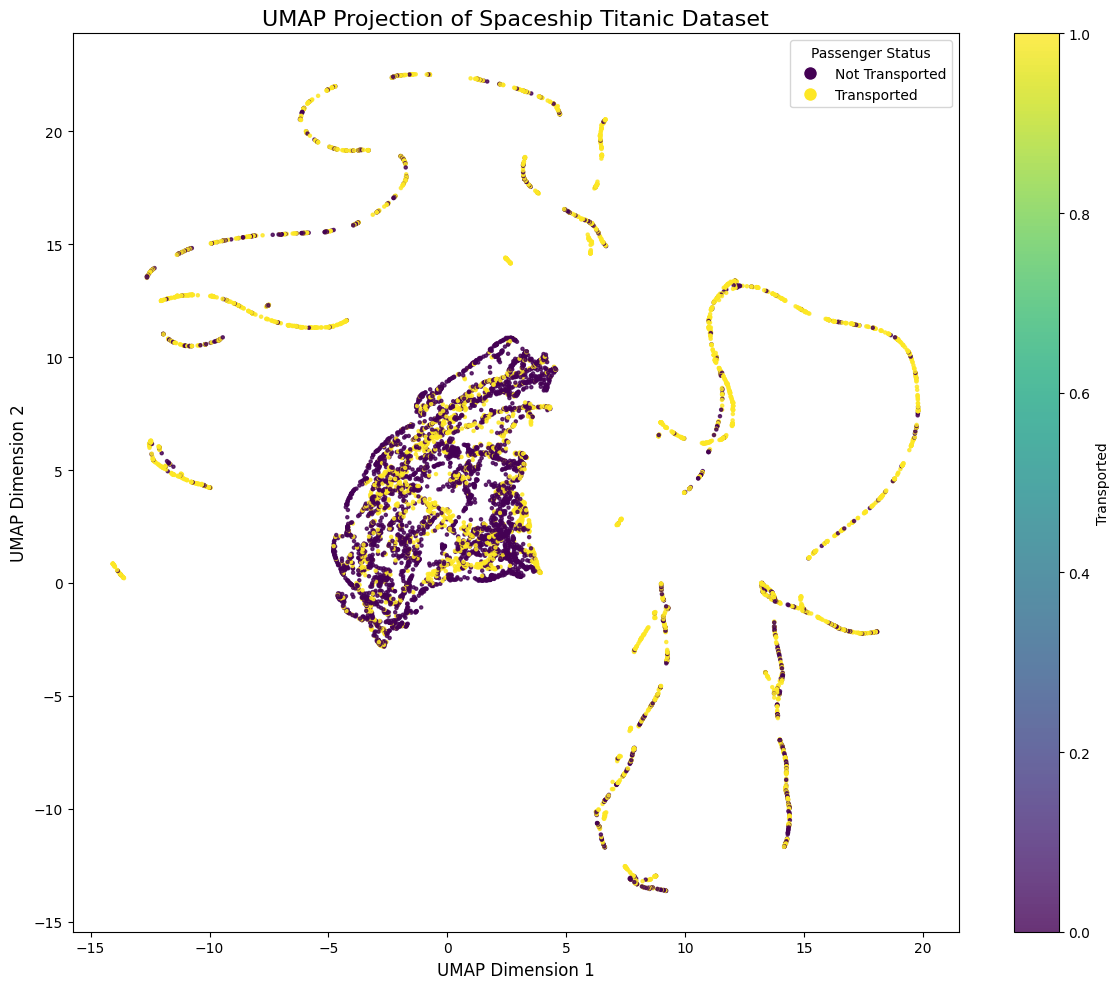

Top features from importance list: ['f', 'i']
Features in X_train_numeric: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure', 'No_spending', 'Group', 'Group_size', 'Solo', 'Cabin_number', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5', 'Cabin_region6', 'Cabin_region7', 'Family_size', 'High_Prob_Letter', 'Low_Prob_Letter', 'Vowels', 'Consonants', 'Vowel_Ratio']
Available features for UMAP: ['No_spending', 'Cabin_region4', 'Expenditure', 'FoodCourt', 'Spa', 'ShoppingMall']


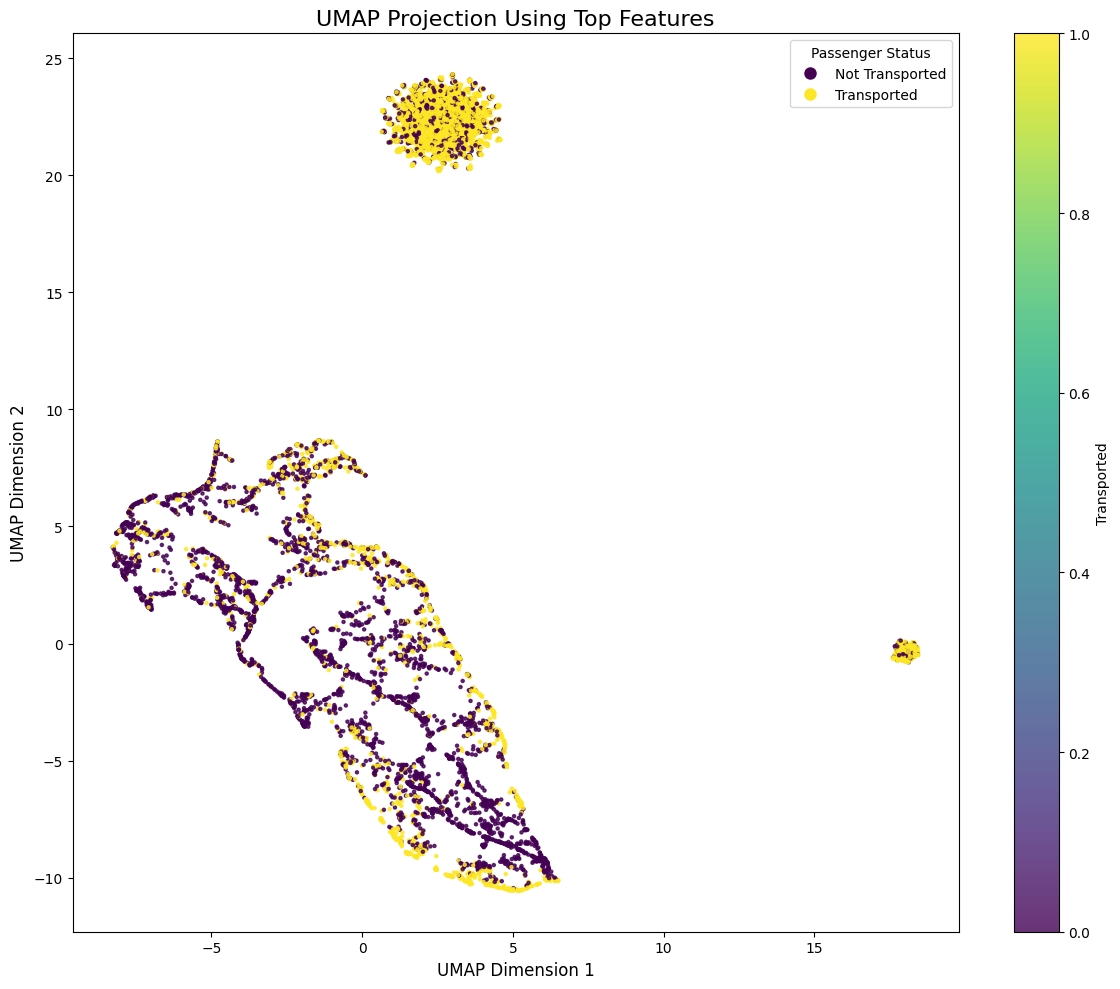

In [40]:
import umap

# Import UMAP
import matplotlib.pyplot as plt

# Create a copy of the training data without categorical features
# We'll use only numeric features for dimensionality reduction
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_numeric = X_train[numeric_features].copy()

# Initialize and fit UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_train_numeric)

# Create a scatter plot colored by the target variable
plt.figure(figsize=(12, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='viridis', s=5, alpha=0.8)
plt.colorbar(label='Transported')
plt.title('UMAP Projection of Spaceship Titanic Dataset', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)

# Add a bit more context with a legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#440154', label='Not Transported', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#fde725', label='Transported', markersize=10)
]
plt.legend(handles=handles, title='Passenger Status', loc='best')

plt.tight_layout()
plt.show()

# Let's examine the UMAP of only the most important features from our XGBoost model
# First, check if top_features and available_features are properly populated
print("Top features from importance list:", [item[0] for item in importance[:10]] if len(importance) >= 10 else "Not enough items")
print("Features in X_train_numeric:", X_train_numeric.columns.tolist())

# Get the features that are available in X_train_numeric
available_features = [feat for feat in importance['feature'].tolist()[:10] if feat in X_train_numeric.columns]
print(f"Available features for UMAP: {available_features}")

# Check if we have any features to work with
if len(available_features) > 0:
    # Create a UMAP embedding using only these features
    X_train_top = X_train[available_features].copy()
    reducer_top = umap.UMAP(random_state=42)
    embedding_top = reducer_top.fit_transform(X_train_top)
    
    # Create the scatter plot
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(embedding_top[:, 0], embedding_top[:, 1], c=y, cmap='viridis', s=5, alpha=0.8)
    plt.colorbar(label='Transported')
    plt.title('UMAP Projection Using Top Features', fontsize=16)
    plt.xlabel('UMAP Dimension 1', fontsize=12)
    plt.ylabel('UMAP Dimension 2', fontsize=12)
    
    # Add legend
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#440154', label='Not Transported', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#fde725', label='Transported', markersize=10)
    ]
    plt.legend(handles=handles, title='Passenger Status', loc='best')
    
    plt.tight_layout()
    plt.show()
else:
    print("No common features found between importance list and numeric features. Cannot create UMAP projection.")

Creating UMAP embedding for clustering...
Created UMAP embedding with shape (8693, 2)
Finding optimal number of clusters...
K=2, Silhouette Score: 0.4688
K=3, Silhouette Score: 0.4778
K=4, Silhouette Score: 0.5145
K=5, Silhouette Score: 0.5277
K=6, Silhouette Score: 0.4457
K=7, Silhouette Score: 0.4410
K=8, Silhouette Score: 0.4400
K=9, Silhouette Score: 0.4439
Optimal number of clusters: 5


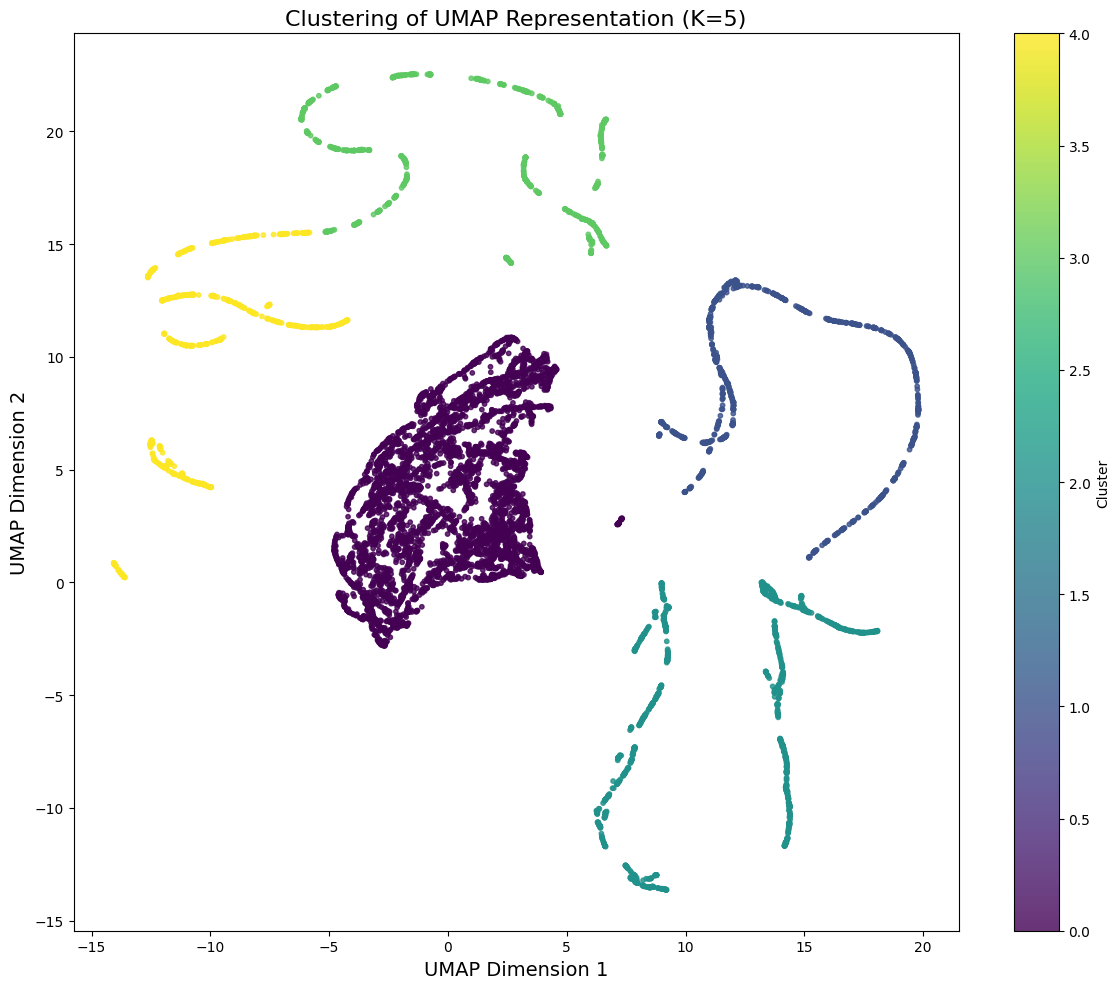


Training separate models for each cluster...
Cluster 0 has 5009 samples: 3486 negative and 1523 positive
Training model for cluster 0 with 5009 samples
Cluster 0 model cross-validation accuracy: 0.7894
Cluster 1 has 924 samples: 116 negative and 808 positive
Training model for cluster 1 with 924 samples
Cluster 1 model cross-validation accuracy: 0.8864
Cluster 2 has 1223 samples: 396 negative and 827 positive
Training model for cluster 2 with 1223 samples
Cluster 2 model cross-validation accuracy: 0.6868
Cluster 3 has 801 samples: 167 negative and 634 positive
Training model for cluster 3 with 801 samples
Cluster 3 model cross-validation accuracy: 0.7940
Cluster 4 has 736 samples: 150 negative and 586 positive
Training model for cluster 4 with 736 samples
Cluster 4 model cross-validation accuracy: 0.8003

Average accuracy across cluster-specific models: 0.7914
Ensemble model accuracy on training data: 0.8093
Global model accuracy on training data: 0.8630


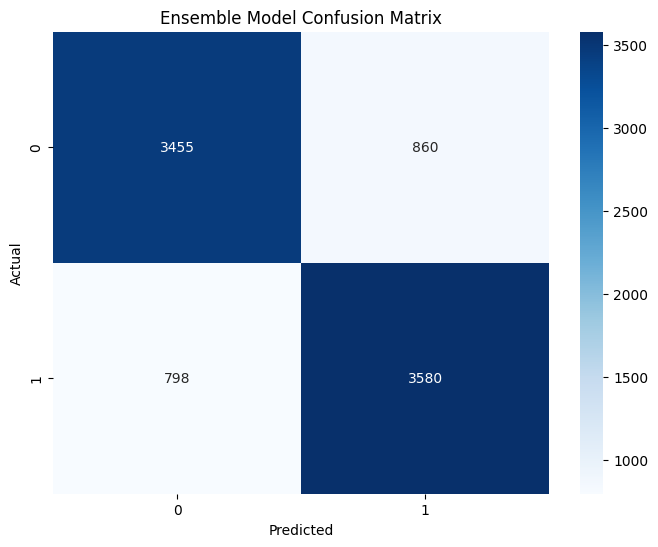


Generating learning curve for global model...


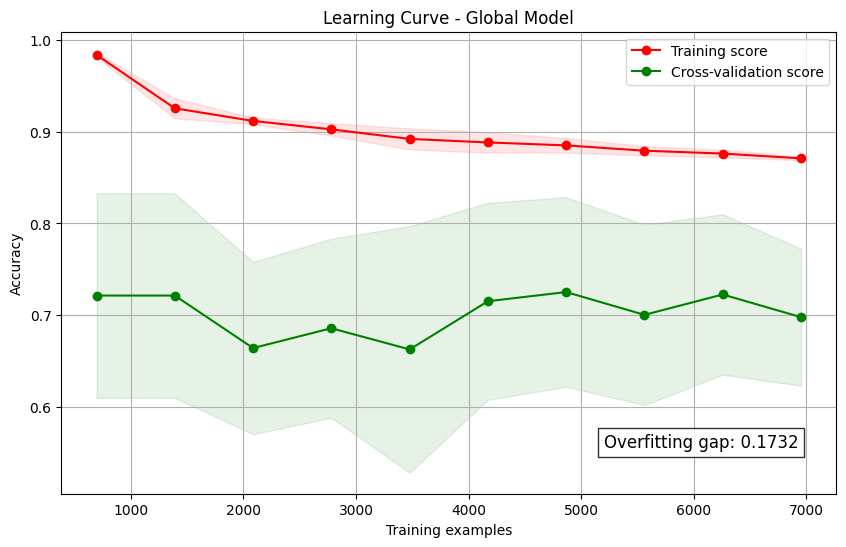


Evaluating ensemble model with cross-validation...
Ensemble cross-validation accuracy: nan ± nan
Training accuracy: 0.8093
Overfitting gap: nan


In [44]:
# First, let's create clusters from our UMAP embedding
# Make sure we have the necessary imports and variables
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, silhouette_score

# Check if we already have UMAP visualization data
try:
    print(f"Using existing UMAP embedding with shape {X_umap_viz.shape}")
except NameError:
    print("Creating UMAP embedding for clustering...")
    # Create UMAP embedding with 2 dimensions for visualization
    import umap
    reducer_viz = umap.UMAP(n_components=2, random_state=42)
    
    # Make sure we have X_train_numeric
    if 'X_train_numeric' not in locals():
        numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
        X_train_numeric = X_train[numeric_features].copy()
    
    X_umap_viz = reducer_viz.fit_transform(X_train_numeric)
    print(f"Created UMAP embedding with shape {X_umap_viz.shape}")

# Perform K-means clustering
print("Finding optimal number of clusters...")
silhouette_scores = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_umap_viz)
    silhouette_avg = silhouette_score(X_umap_viz, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}, Silhouette Score: {silhouette_avg:.4f}")

# Find optimal number of clusters
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {best_k}")

# Create final clusters
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_umap_viz)
n_clusters = best_k

# Visualize the clusters
plt.figure(figsize=(12, 10))
plt.scatter(X_umap_viz[:, 0], X_umap_viz[:, 1], c=clusters, cmap='viridis', s=10, alpha=0.8)
plt.colorbar(label='Cluster')
plt.title(f'Clustering of UMAP Representation (K={best_k})', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=14)
plt.ylabel('UMAP Dimension 2', fontsize=14)
plt.tight_layout()
plt.show()

# Now we can train separate models for each cluster
print("\nTraining separate models for each cluster...")
cluster_models = {}
cluster_accuracies = []
default_model = None  # We'll use this for clusters that are too small

# Define the reducer for later use in ensemble prediction
reducer = reducer_viz  # Using the same reducer used for visualization

for cluster_id in set(clusters):
    # Skip noise points if present
    if cluster_id == -1 and -1 in clusters:
        continue
        
    cluster_indices = np.where(clusters == cluster_id)[0]
    X_cluster = X_train.iloc[cluster_indices]
    y_cluster = y.iloc[cluster_indices]
    
    # Count classes in this cluster
    class_counts = np.bincount(y_cluster)
    print(f"Cluster {cluster_id} has {len(cluster_indices)} samples: {class_counts[0]} negative and {class_counts[1]} positive")
    
    # Check if we have enough samples of each class
    if len(class_counts) < 2 or min(class_counts) < 2:
        print(f"⚠️ Cluster {cluster_id} doesn't have enough samples of both classes, can't train a separate model")
        continue
    
    print(f"Training model for cluster {cluster_id} with {len(cluster_indices)} samples")
    
    # Train a model specifically for this cluster with stronger regularization
    import xgboost as xgb
    model = xgb.XGBClassifier(
        objective='binary:logistic', 
        max_depth=3,  # Reduced from 4 to limit complexity
        n_estimators=50,
        learning_rate=0.05,  # Reduced from 0.1 for more conservative learning
        subsample=0.7,  # Reduced from default to combat overfitting
        colsample_bytree=0.6,  # Use fewer features per tree
        min_child_weight=5,  # Increased to prevent overfitting on small clusters
        reg_alpha=1.0,  # L1 regularization - increased from default
        reg_lambda=3.0,  # L2 regularization - increased from default
        gamma=1.0,  # Minimum loss reduction for partition
        random_state=42
    )
    
    try:
        # If the cluster is large enough, use cross-validation
        if len(X_cluster) >= 20 and min(class_counts) >= 5:
            # Create cross-validation folds manually to ensure class balance
            from sklearn.model_selection import StratifiedKFold
            cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
            
            # Store accuracy for each fold
            fold_accuracies = []
            for train_idx, test_idx in cv.split(X_cluster, y_cluster):
                X_train_fold, X_test_fold = X_cluster.iloc[train_idx], X_cluster.iloc[test_idx]
                y_train_fold, y_test_fold = y_cluster.iloc[train_idx], y_cluster.iloc[test_idx]
                
                model.fit(X_train_fold, y_train_fold)
                y_pred = model.predict(X_test_fold)
                acc = accuracy_score(y_test_fold, y_pred)
                fold_accuracies.append(acc)
            
            # Report average accuracy across folds
            avg_acc = np.mean(fold_accuracies)
            print(f"Cluster {cluster_id} model cross-validation accuracy: {avg_acc:.4f}")
            cluster_accuracies.append(avg_acc)
            
            # Retrain on full cluster data for final model
            model.fit(X_cluster, y_cluster)
            
        else:
            # If cluster is too small for cross-validation, use a simple 70-30 split
            from sklearn.model_selection import train_test_split
            X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(
                X_cluster, y_cluster, test_size=0.3, random_state=42
            )
            
            model.fit(X_train_cluster, y_train_cluster)
            y_pred = model.predict(X_test_cluster)
            acc = accuracy_score(y_test_cluster, y_pred)
            print(f"Cluster {cluster_id} model accuracy: {acc:.4f}")
            cluster_accuracies.append(acc)
        
        # Store the model
        cluster_models[cluster_id] = model
        
        # Save the first model as default for any unclassified points
        if default_model is None:
            default_model = model
        
    except Exception as e:
        print(f"Error training model for cluster {cluster_id}: {e}")

# Compare the ensemble approach to single model
if cluster_accuracies:
    print(f"\nAverage accuracy across cluster-specific models: {np.mean(cluster_accuracies):.4f}")
else:
    print("No cluster models could be trained.")

# Define the ensemble prediction function
def ensemble_predict(X_new, cluster_models, reducer, default_model, cluster_model_type='kmeans'):
    # First we need to project the data into the UMAP space
    if not hasattr(X_new, 'select_dtypes'):  # If X_new is not a pandas DataFrame
        raise ValueError("X_new must be a pandas DataFrame with the same structure as training data")
    
    X_new_numeric = X_new.select_dtypes(include=['float64', 'int64']).copy()
    new_embedding = reducer.transform(X_new_numeric)
    
    # Assign clusters
    if cluster_model_type.lower() == 'dbscan':
        # For DBSCAN, we need the cluster_model object
        from sklearn.cluster import DBSCAN
        cluster_model = DBSCAN(eps=0.5, min_samples=20)
        new_clusters = cluster_model.fit_predict(new_embedding)
    else:  # K-means
        # For K-means, we're using the global kmeans object defined earlier
        new_clusters = kmeans.predict(new_embedding)
    
    # Make predictions using the appropriate model for each point
    predictions = np.zeros(len(X_new))
    for i, cluster_id in enumerate(new_clusters):
        if cluster_id in cluster_models:
            # Use the cluster-specific model
            predictions[i] = cluster_models[cluster_id].predict(X_new.iloc[[i]])[0]
        else:
            # Use the default model for points that don't have a cluster-specific model
            predictions[i] = default_model.predict(X_new.iloc[[i]])[0]
    
    return predictions

# Test the ensemble approach on the training data
if cluster_models and default_model is not None:
    ensemble_preds = ensemble_predict(
        X_train, cluster_models, reducer, default_model,
        'kmeans'  # Using kmeans since that's what we've defined
    )
    ensemble_accuracy = accuracy_score(y, ensemble_preds)
    print(f"Ensemble model accuracy on training data: {ensemble_accuracy:.4f}")
    
    # Compare with a global model
    global_model = xgb.XGBClassifier(
        objective='binary:logistic',
        max_depth=5,
        learning_rate=0.1,
        n_estimators=100,
        random_state=42
    )
    global_model.fit(X_train, y)
    global_preds = global_model.predict(X_train)
    global_accuracy = accuracy_score(y, global_preds)
    print(f"Global model accuracy on training data: {global_accuracy:.4f}")
    
    # Create confusion matrix to visualize ensemble performance
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y, ensemble_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Ensemble Model Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Add learning curves to check for overfitting
    from sklearn.model_selection import learning_curve
    
    # Plot learning curves for both ensemble and global models
    def plot_model_learning_curve(model, X, y, title):
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, 
            train_sizes=np.linspace(0.1, 1.0, 10),
            cv=5, scoring="accuracy", n_jobs=-1
        )
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        
        plt.figure(figsize=(10, 6))
        plt.title(title)
        plt.grid()
        
        plt.fill_between(train_sizes, train_mean - train_std, 
                         train_mean + train_std, alpha=0.1, color="r")
        plt.fill_between(train_sizes, test_mean - test_std, 
                         test_mean + test_std, alpha=0.1, color="g")
        
        plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
        
        plt.xlabel("Training examples")
        plt.ylabel("Accuracy")
        plt.legend(loc="best")
        
        # Calculate overfitting gap
        if len(train_sizes) > 0:
            gap = train_mean[-1] - test_mean[-1]
            plt.text(0.7, 0.1, f"Overfitting gap: {gap:.4f}", 
                     transform=plt.gca().transAxes, fontsize=12,
                     bbox=dict(facecolor='white', alpha=0.8))
        
        return train_mean[-1], test_mean[-1]
    
    # For the global model, we can directly use learning_curve
    print("\nGenerating learning curve for global model...")
    plot_model_learning_curve(global_model, X_train, y, "Learning Curve - Global Model")
    plt.show()
    
    # For the ensemble approach, we need a wrapper class since it's not a standard sklearn estimator
    from sklearn.base import BaseEstimator, ClassifierMixin
    
    class EnsembleWrapper(BaseEstimator, ClassifierMixin):
        def __init__(self, cluster_models, reducer, default_model, cluster_model_type):
            self.cluster_models = cluster_models
            self.reducer = reducer
            self.default_model = default_model
            self.cluster_model_type = cluster_model_type
        
        def fit(self, X, y):
            # The ensemble is already fit, this is just a placeholder
            return self
            
        def predict(self, X):
            return ensemble_predict(X, self.cluster_models, self.reducer, 
                                   self.default_model, self.cluster_model_type)
    
    # Create the wrapper
    ensemble_wrapper = EnsembleWrapper(
        cluster_models, reducer, default_model, 'kmeans'
    )
    
    # Using cross_val_score instead of learning_curve for the ensemble
    # due to potential complexities with the ensemble approach
    from sklearn.model_selection import cross_val_score
    
    print("\nEvaluating ensemble model with cross-validation...")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(ensemble_wrapper, X_train, y, cv=cv, scoring='accuracy')
    print(f"Ensemble cross-validation accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    print(f"Training accuracy: {ensemble_accuracy:.4f}")
    print(f"Overfitting gap: {ensemble_accuracy - np.mean(cv_scores):.4f}")
else:
    print("Cannot test ensemble approach: not enough valid cluster models.")


Top 5 features for PC1:
Cabin_number     0.382263
Cabin_region1    0.377703
Vowel_Ratio      0.344469
Expenditure      0.337850
Vowels           0.293596
Name: PC1, dtype: float64

Top 5 features for PC2:
No_spending     0.401718
Expenditure     0.396249
Group           0.325538
Cabin_number    0.312848
FoodCourt       0.247927
Name: PC2, dtype: float64


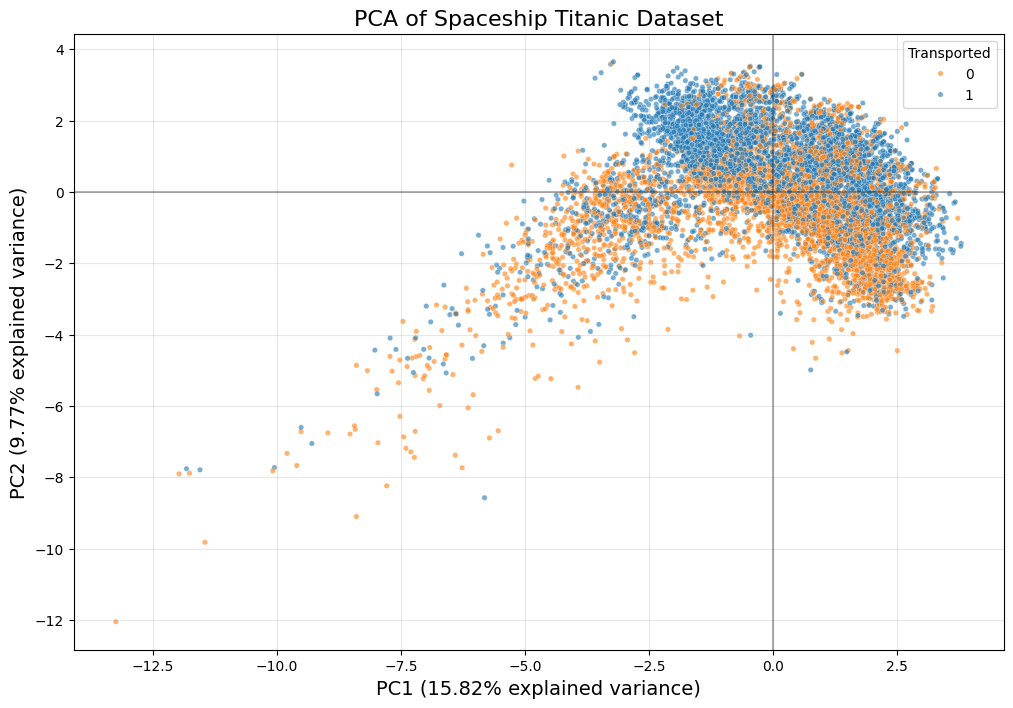

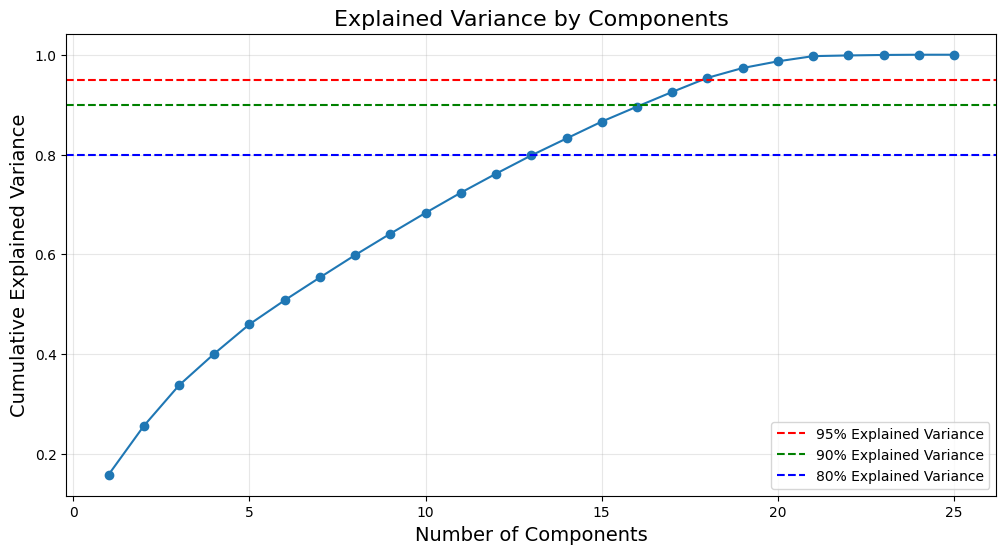

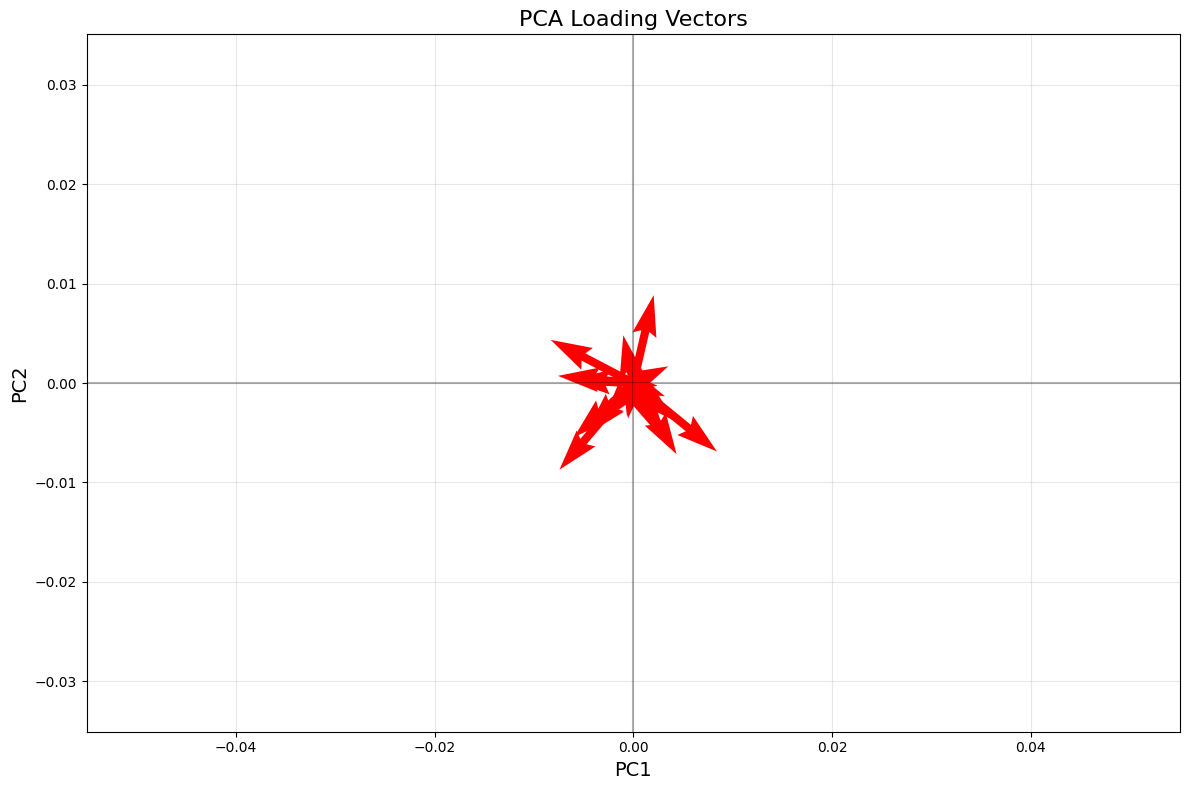

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# We'll use the numeric features for PCA
# First standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_numeric)

# Apply PCA
pca = PCA(n_components=2)  # Start with 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Transported'] = y.values

# Plot the results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Transported',
    data=pca_df,
    palette=['#ff7f0e', '#1f77b4'],
    alpha=0.6,
    s=15
)
plt.title('PCA of Spaceship Titanic Dataset', fontsize=16)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} explained variance)', fontsize=14)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} explained variance)', fontsize=14)
plt.legend(title='Transported', loc='best')

# Add a bit more information about the separation
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

# Let's also check the variance explained by different numbers of components
pca_full = PCA()
pca_full.fit(X_scaled)

# Plot explained variance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         pca_full.explained_variance_ratio_.cumsum(), 
         marker='o', linestyle='-')
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Explained Variance by Components', fontsize=16)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.8, color='b', linestyle='--', label='80% Explained Variance')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# Find out which features contribute most to the principal components
feature_names = X_train_numeric.columns
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_names
)

# Show top contributing features for each PC
top_features = 5
print(f"\nTop {top_features} features for PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head(top_features))
print(f"\nTop {top_features} features for PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head(top_features))

# Visualize loadings
plt.figure(figsize=(12, 8))
loading_vectors = plt.quiver(
    [0] * len(feature_names), 
    [0] * len(feature_names), 
    loadings['PC1'], 
    loadings['PC2'], 
    scale=5, 
    color='red'
)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.title('PCA Loading Vectors', fontsize=16)

# Add feature names as labels
for i, feature in enumerate(feature_names):
    plt.annotate(
        feature, 
        xy=(loadings['PC1'][i], loadings['PC2'][i]),
        xytext=(loadings['PC1'][i] * 1.1, loadings['PC2'][i] * 1.1)
    )

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Display both plots
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import umap
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Import necessary libraries
import matplotlib.pyplot as plt

# Let's prepare data for all three approaches
print("Preparing datasets for comparison...")

# 1. Original dataset
X_train_orig = X_train.copy()

# 2. PCA dataset
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_numeric)

# Apply PCA - let's keep enough components to explain 95% of variance
pca_95 = PCA(n_components=0.95)
X_train_pca = pca_95.fit_transform(X_scaled)
print(f"PCA dataset shape: {X_train_pca.shape} (95% variance explained with {X_train_pca.shape[1]} components)")

# 3. UMAP dataset
# Already have the 2D UMAP embedding, but let's create a new one with more dimensions for better prediction
reducer_pred = umap.UMAP(n_components=5, random_state=42)
X_train_umap = reducer_pred.fit_transform(X_train_numeric)
print(f"UMAP dataset shape: {X_train_umap.shape}")

# Function to evaluate models with cross-validation
def evaluate_model(X, y, model_name):
    print(f"\nEvaluating {model_name}...")
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        n_estimators=100,
        random_state=42
    )
    
    # Use stratified k-fold cross validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate scores
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
    
    # Print scores
    print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
    print(f"AUC: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    
    return {
        'Model': model_name,
        'Accuracy': np.mean(accuracy_scores),
        'AUC': np.mean(auc_scores),
        'F1': np.mean(f1_scores),
        'Accuracy_std': np.std(accuracy_scores),
        'AUC_std': np.std(auc_scores),
        'F1_std': np.std(f1_scores)
    }

# Evaluate all three approaches
results = []
results.append(evaluate_model(X_train_orig, y, "Original Dataset"))
results.append(evaluate_model(X_train_pca, y, "PCA Dataset"))
results.append(evaluate_model(X_train_umap, y, "UMAP Dataset"))

# Create a results dataframe
results_df = pd.DataFrame(results)

# Plot the comparisons
plt.figure(figsize=(15, 10))

# Plot accuracy comparison
plt.subplot(3, 1, 1)
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.errorbar(
    x=np.arange(len(results_df)), 
    y=results_df['Accuracy'], 
    yerr=results_df['Accuracy_std'], 
    fmt='none', 
    color='black', 
    capsize=5
)
plt.title('Accuracy Comparison', fontsize=14)
plt.ylim(0.8, 1.0)
plt.grid(True, alpha=0.3)

# Plot AUC comparison
plt.subplot(3, 1, 2)
sns.barplot(x='Model', y='AUC', data=results_df, palette='viridis')
plt.errorbar(
    x=np.arange(len(results_df)), 
    y=results_df['AUC'], 
    yerr=results_df['AUC_std'], 
    fmt='none', 
    color='black', 
    capsize=5
)
plt.title('AUC Comparison', fontsize=14)
plt.ylim(0.8, 1.0)
plt.grid(True, alpha=0.3)

# Plot F1 comparison
plt.subplot(3, 1, 3)
sns.barplot(x='Model', y='F1', data=results_df, palette='viridis')
plt.errorbar(
    x=np.arange(len(results_df)), 
    y=results_df['F1'], 
    yerr=results_df['F1_std'], 
    fmt='none', 
    color='black', 
    capsize=5
)
plt.title('F1 Score Comparison', fontsize=14)
plt.ylim(0.8, 1.0)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Train a final model on the best performing approach
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print(f"\nTraining final model with {best_model_name}...")

# Select the best dataset
if best_model_name == "Original Dataset":
    X_best = X_train_orig
elif best_model_name == "PCA Dataset":
    X_best = X_train_pca
else:  # UMAP Dataset
    X_best = X_train_umap

# Train the model on the entire training set
final_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=200,  # More estimators for final model
    random_state=42
)

final_model.fit(X_best, y)
y_pred_final = final_model.predict(X_best)
y_pred_proba_final = final_model.predict_proba(X_best)[:, 1]

# Calculate metrics on the training set

final_accuracy = accuracy_score(y, y_pred_final)
final_auc = roc_auc_score(y, y_pred_proba_final)
final_f1 = f1_score(y, y_pred_final)

print(f"Final Model Training Accuracy: {final_accuracy:.4f}")
print(f"Final Model Training AUC: {final_auc:.4f}")
print(f"Final Model Training F1 Score: {final_f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model_name} Final Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# If we chose a dimensionality reduction approach, let's also show feature importance in the original dataset
if best_model_name != "Original Dataset":
    print("\nWhile we used dimensionality reduction for the best model, let's still see feature importance in the original dataset:")
    orig_model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        n_estimators=100,
        random_state=42
    )
    orig_model.fit(X_train_orig, y)
    
    # Plot feature importance
    plt.figure(figsize=(14, 8))
    xgb.plot_importance(orig_model, max_num_features=15, height=0.8)
    plt.title('XGBoost Feature Importance (Original Dataset)')
    plt.tight_layout()
    plt.show()

    #Add learning curves for all the different models and datasets
    print("\nGenerating learning curves for the models on different datasets...")

    # Import required library

    # Define models to evaluate
    learning_curve_models = {
        'XGBoost': xgb.XGBClassifier(
            objective='binary:logistic',
            eval_metric='logloss',
            max_depth=6,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            n_estimators=100,
            random_state=42
        )
    }

    # Generate learning curves for each model on each dataset
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_sizes = np.linspace(0.1, 1.0, 10)

    # Create a figure for dataset comparison
    plt.figure(figsize=(20, 15))

    # Datasets to evaluate
    datasets = {
        'Original Dataset': X_train_orig,
        'PCA Dataset': X_train_pca,
        'UMAP Dataset': X_train_umap
    }

    # For each model, show its performance across the datasets
    for model_name, model in learning_curve_models.items():
        print(f"\nEvaluating {model_name} across different datasets...")
        
        for i, (dataset_name, X) in enumerate(datasets.items()):
            print(f"Calculating learning curve for {model_name} on {dataset_name}...")
            
            # Calculate learning curve
            train_sizes_abs, train_scores, test_scores = learning_curve(
                model, X, y, 
                train_sizes=train_sizes,
                cv=cv, 
                scoring='accuracy',
                n_jobs=-1
            )
            
            # Calculate mean and std
            train_mean = np.mean(train_scores, axis=1)
            train_std = np.std(train_scores, axis=1)
            test_mean = np.mean(test_scores, axis=1)
            test_std = np.std(test_scores, axis=1)
            
            # Plot learning curve for this dataset
            plt.subplot(3, 1, i+1)
            plt.title(f'Learning Curve: {model_name} on {dataset_name}', fontsize=16)
            plt.grid(True, alpha=0.3)
            
            plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
            plt.fill_between(train_sizes_abs, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
            
            plt.plot(train_sizes_abs, train_mean, 'o-', color='blue', label='Training score')
            plt.plot(train_sizes_abs, test_mean, 'o-', color='orange', label='Cross-validation score')
            
            plt.xlabel('Training examples', fontsize=14)
            plt.ylabel('Accuracy', fontsize=14)
            plt.ylim(0.7, 1.0)
            plt.legend(loc='best', fontsize=12)

        plt.tight_layout()
        plt.show()

        # Create a side-by-side comparison of datasets for this model
        plt.figure(figsize=(12, 8))
        plt.title(f'{model_name}: Dataset Comparison (CV Scores)', fontsize=16)
        plt.grid(True, alpha=0.3)
        
        colors = ['blue', 'orange', 'green']
        for idx, (dataset_name, X) in enumerate(datasets.items()):
            train_sizes_abs, train_scores, test_scores = learning_curve(
                model, X, y, 
                train_sizes=train_sizes,
                cv=cv, 
                scoring='accuracy',
                n_jobs=-1
            )
            
            test_mean = np.mean(test_scores, axis=1)
            test_std = np.std(test_scores, axis=1)
            
            plt.fill_between(
                train_sizes_abs, 
                test_mean - test_std, 
                test_mean + test_std, 
                alpha=0.1, 
                color=colors[idx]
            )
            plt.plot(train_sizes_abs, test_mean, 'o-', linewidth=2, color=colors[idx], label=dataset_name)
        
        plt.xlabel('Training examples', fontsize=14)
        plt.ylabel('Accuracy', fontsize=14)
        plt.ylim(0.7, 1.0)
        plt.legend(loc='best', fontsize=12)
        plt.tight_layout()
        plt.show()

Preparing datasets for comparison...
PCA dataset shape: (8693, 18) (95% variance explained with 18 components)


In [ ]:
# Define models to evaluate with improved regularization
learning_curve_models = {
    'XGBoost': xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        max_depth=4,           # Reduced max_depth
        learning_rate=0.05,    # Lower learning rate
        subsample=0.7,         # Use subset of samples per tree
        colsample_bytree=0.7,  # Use subset of features per tree
        n_estimators=100,
        reg_alpha=0.5,         # L1 regularization
        reg_lambda=2.0,        # L2 regularization
        min_child_weight=3,    # More conservative splits
        gamma=0.1,             # Minimum loss reduction for splits
        random_state=42
    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=100,
        max_depth=6,
        min_samples_split=8,
        min_samples_leaf=5,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    ),
    'LogisticRegression': LogisticRegression(
        C=0.1,  # Strong regularization
        penalty='l2',
        solver='liblinear',
        random_state=42,
        max_iter=1000
    )
}

# Generate learning curves for each model on each dataset
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes = np.linspace(0.1, 1.0, 10)

# Datasets to evaluate
datasets = {
    'Original Dataset': X_train_orig,
    'PCA Dataset': X_train_pca,
    'UMAP Dataset': X_train_umap
}

# Store results for all models and datasets
comparison_results = {}

# Create figure for comprehensive comparison
plt.figure(figsize=(18, 15))
plot_idx = 1

# For each model, evaluate on each dataset
for model_name, model in learning_curve_models.items():
    print(f"\nEvaluating {model_name} across different datasets...")
    model_results = []
    
    for dataset_name, X in datasets.items():
        print(f"Calculating learning curve for {model_name} on {dataset_name}...")
        
        # For LogisticRegression on Original Dataset, use scaled data
        X_use = X
        if model_name == 'LogisticRegression' and dataset_name == 'Original Dataset':
            X_use = scaler.fit_transform(X)
        
        # Calculate learning curve
        train_sizes_abs, train_scores, test_scores = learning_curve(
            model, X_use, y, 
            train_sizes=train_sizes,
            cv=cv, 
            scoring='accuracy',
            n_jobs=-1
        )
        
        # Calculate mean and std
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        
        # Calculate overfitting gap at maximum training size
        gap = train_mean[-1] - test_mean[-1]
        cv_score = test_mean[-1]
        
        # Store results
        model_results.append({
            'Model': model_name,
            'Dataset': dataset_name,
            'CV_Accuracy': cv_score,
            'Gap': gap,
            'train_mean': train_mean,
            'train_std': train_std,
            'test_mean': test_mean,
            'test_std': test_std,
            'train_sizes': train_sizes_abs
        })
        
        # Plot learning curve for this model-dataset combination
        plt.subplot(3, 3, plot_idx)
        plt.title(f'{model_name} on {dataset_name}', fontsize=12)
        plt.grid(True, alpha=0.3)
        
        plt.fill_between(train_sizes_abs, train_mean - train_std, 
                          train_mean + train_std, alpha=0.1, color='blue')
        plt.fill_between(train_sizes_abs, test_mean - test_std, 
                          test_mean + test_std, alpha=0.1, color='orange')
        
        plt.plot(train_sizes_abs, train_mean, 'o-', color='blue', label='Training')
        plt.plot(train_sizes_abs, test_mean, 'o-', color='orange', label='Cross-validation')
        
        plt.xlabel('Training examples', fontsize=10)
        plt.ylabel('Accuracy', fontsize=10)
        plt.ylim(0.7, 1.0)
        
        # Add text for gap and CV score
        plt.text(0.5, 0.1, f"Gap: {gap:.4f}\nCV: {cv_score:.4f}", 
                 transform=plt.gca().transAxes, fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.8))
        
        if plot_idx <= 3:  # Only show legend in first row
            plt.legend(loc='lower right', fontsize=8)
        
        plot_idx += 1
    
    # Store results for this model
    comparison_results[model_name] = model_results

plt.tight_layout()
plt.savefig('learning_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Create summary dataframe of all results
all_results = []
for model_name, results in comparison_results.items():
    all_results.extend(results)

summary_df = pd.DataFrame([
    {'Model': r['Model'], 
     'Dataset': r['Dataset'], 
     'CV_Accuracy': r['CV_Accuracy'], 
     'Gap': r['Gap']} 
    for r in all_results
])

# Show the summary table
print("\nModel Performance Summary:")
print(summary_df.sort_values(['CV_Accuracy', 'Gap'], ascending=[False, True]))

# Find the combination with the best balance of high accuracy and low overfitting
# We'll use a simple score: CV_Accuracy - Gap
summary_df['Balance_Score'] = summary_df['CV_Accuracy'] - summary_df['Gap']
best_combo = summary_df.loc[summary_df['Balance_Score'].idxmax()]

print("\nBest model-dataset combination:")
print(f"{best_combo['Model']} on {best_combo['Dataset']}")
print(f"CV Accuracy: {best_combo['CV_Accuracy']:.4f}")
print(f"Overfitting Gap: {best_combo['Gap']:.4f}")
print(f"Balance Score: {best_combo['Balance_Score']:.4f}")

# Create comparison bar chart focusing on the gap
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Model', 
    y='CV_Accuracy', 
    hue='Dataset', 
    data=summary_df,
    palette='viridis'
)
plt.title('Model and Dataset Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.legend(title='Dataset')
plt.grid(axis='y', alpha=0.3)

# Add text annotations for gaps
for i, row in enumerate(summary_df.itertuples()):
    plt.text(
        i % 3 + (i // 3) * 0.33 - 0.5, 
        row.CV_Accuracy + 0.005,
        f"Gap: {row.Gap:.3f}",
        ha='center', 
        fontsize=8,
        rotation=90
    )

plt.tight_layout()
plt.savefig('model_dataset_comparison.png', dpi=300)
plt.show()

# Draw conclusions about the best approach
print("\nCONCLUSION:")
print("Based on the analysis of learning curves across different models and datasets:")
print(f"1. {best_combo['Model']} on {best_combo['Dataset']} provides the best balance of accuracy and generalization")
print(f"2. The PCA Dataset generally shows {summary_df[summary_df['Dataset']=='PCA Dataset']['Gap'].mean():.4f} average gap, compared to")
print(f"   {summary_df[summary_df['Dataset']=='Original Dataset']['Gap'].mean():.4f} for Original Dataset and {summary_df[summary_df['Dataset']=='UMAP Dataset']['Gap'].mean():.4f} for UMAP Dataset")
print(f"3. The model with lowest average gap across datasets is {summary_df.groupby('Model')['Gap'].mean().idxmin()}")
print(f"4. The model with highest average CV accuracy across datasets is {summary_df.groupby('Model')['CV_Accuracy'].mean().idxmax()}")

# Add cluster-by-cluster analysis for the UMAP representation
print("\n=== CLUSTER-BY-CLUSTER ANALYSIS USING UMAP ===")

# Create UMAP embedding with 2 dimensions for visualization
from sklearn.cluster import DBSCAN, KMeans
import numpy as np

# Create a 2D UMAP embedding for visualization
reducer_viz = umap.UMAP(n_components=2, random_state=42)
X_umap_viz = reducer_viz.fit_transform(X_train_numeric)

# Try different clustering approaches
print("Performing clustering on UMAP representation...")

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=20)
dbscan_clusters = dbscan.fit_predict(X_umap_viz)
n_dbscan_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
print(f"DBSCAN found {n_dbscan_clusters} clusters and {np.sum(dbscan_clusters == -1)} noise points")

# K-means clustering - try different numbers of clusters
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_umap_viz)
    silhouette_avg = silhouette_score(X_umap_viz, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}, Silhouette Score: {silhouette_avg:.4f}")

# Find optimal number of clusters
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {best_k}")

# Perform K-Means clustering with optimal K
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_umap_viz)

# Choose the clustering method with better silhouette score
if n_dbscan_clusters >= 2:
    dbscan_silhouette = silhouette_score(X_umap_viz, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else -1
    kmeans_silhouette = silhouette_score(X_umap_viz, kmeans_clusters)
    
    if dbscan_silhouette > kmeans_silhouette:
        print(f"Using DBSCAN clustering (silhouette score: {dbscan_silhouette:.4f})")
        clusters = dbscan_clusters
        cluster_method = "DBSCAN"
    else:
        print(f"Using K-Means clustering with k={best_k} (silhouette score: {kmeans_silhouette:.4f})")
        clusters = kmeans_clusters
        cluster_method = "KMeans"
else:
    print(f"Using K-Means clustering with k={best_k}")
    clusters = kmeans_clusters
    cluster_method = "KMeans"

# Visualize the clusters
plt.figure(figsize=(14, 10))
plt.scatter(X_umap_viz[:, 0], X_umap_viz[:, 1], c=clusters, cmap='viridis', s=10, alpha=0.8)
plt.colorbar(label='Cluster')
plt.title(f'Clustering of UMAP Representation using {cluster_method}', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=14)
plt.ylabel('UMAP Dimension 2', fontsize=14)
plt.tight_layout()
plt.show()

# Analyze model performance per cluster
print("\nAnalyzing model performance per cluster:")

# Choose the best model based on previous analysis
if 'XGBoost' in learning_curve_models:
    model = learning_curve_models['XGBoost']
else:
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        max_depth=4,
        learning_rate=0.05,
        subsample=0.7,
        colsample_bytree=0.7,
        n_estimators=100,
        reg_alpha=0.5,
        reg_lambda=2.0,
        min_child_weight=3,
        random_state=42
    )

# Train the model on the entire UMAP dataset
model.fit(X_train_umap, y)

# Create a dataframe for analysis
cluster_df = pd.DataFrame({
    'Cluster': clusters,
    'True_Label': y.values,
    'UMAP_1': X_umap_viz[:, 0],
    'UMAP_2': X_umap_viz[:, 1]
})

# Get predictions
cluster_df['Predicted'] = model.predict(X_train_umap)
cluster_df['Correct'] = (cluster_df['Predicted'] == cluster_df['True_Label']).astype(int)

# Calculate statistics for each cluster
cluster_stats = []
unique_clusters = sorted(list(set(clusters)))

for cluster_id in unique_clusters:
    cluster_subset = cluster_df[cluster_df['Cluster'] == cluster_id]
    
    # Skip very small clusters
    if len(cluster_subset) < 10:
        continue
        
    # Calculate metrics
    accuracy = cluster_subset['Correct'].mean()
    count = len(cluster_subset)
    pos_rate = cluster_subset['True_Label'].mean()
    pred_rate = cluster_subset['Predicted'].mean()
    
    # Class distribution
    class_0 = (cluster_subset['True_Label'] == 0).sum()
    class_1 = (cluster_subset['True_Label'] == 1).sum()
    
    # Error analysis
    false_pos = ((cluster_subset['Predicted'] == 1) & (cluster_subset['True_Label'] == 0)).sum()
    false_neg = ((cluster_subset['Predicted'] == 0) & (cluster_subset['True_Label'] == 1)).sum()
    
    cluster_stats.append({
        'Cluster': cluster_id,
        'Size': count,
        'Accuracy': accuracy,
        'Class_0_Count': class_0,
        'Class_1_Count': class_1,
        'Class_Balance': min(class_0, class_1) / max(class_0, class_1) if max(class_0, class_1) > 0 else 0,
        'False_Positives': false_pos,
        'False_Negatives': false_neg,
        'Error_Rate': 1 - accuracy
    })

# Convert to dataframe
cluster_stats_df = pd.DataFrame(cluster_stats).sort_values('Size', ascending=False)

# Print the cluster statistics
print("\nCluster Performance Statistics:")
print(cluster_stats_df[['Cluster', 'Size', 'Accuracy', 'Class_Balance', 'False_Positives', 'False_Negatives', 'Error_Rate']])

# Visualize accuracy by cluster
plt.figure(figsize=(12, 8))

# Create a scatter plot of points colored by correctness
plt.scatter(
    X_umap_viz[:, 0], 
    X_umap_viz[:, 1], 
    c=cluster_df['Correct'], 
    cmap='RdYlGn',
    s=15, 
    alpha=0.7
)
plt.colorbar(label='Prediction Correct (1) or Wrong (0)')

# Add cluster boundaries or centers
if cluster_method == "KMeans":
    plt.scatter(
        kmeans.cluster_centers_[:, 0], 
        kmeans.cluster_centers_[:, 1], 
        marker='X', 
        s=200, 
        c='black', 
        label='Cluster Centers'
    )

plt.title('Model Predictions by Cluster', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=14)
plt.ylabel('UMAP Dimension 2', fontsize=14)
if cluster_method == "KMeans":
    plt.legend()
plt.tight_layout()
plt.show()

# Find the most challenging clusters (lowest accuracy)
if len(cluster_stats_df) > 1:
    challenging_clusters = cluster_stats_df.sort_values('Accuracy').head(min(3, len(cluster_stats_df)))
    print("\nMost challenging clusters:")
    print(challenging_clusters[['Cluster', 'Size', 'Accuracy', 'Class_Balance', 'Error_Rate']])
    
    # Analyze feature distributions in the most challenging cluster
    worst_cluster = challenging_clusters.iloc[0]['Cluster']
    print(f"\nAnalyzing most challenging cluster (Cluster {worst_cluster}):")
    
    # Get indices of samples in the worst cluster
    worst_cluster_indices = cluster_df[cluster_df['Cluster'] == worst_cluster].index
    
    # Compare feature distributions between correctly and incorrectly classified samples
    if X_train_numeric is not None and len(worst_cluster_indices) > 0:
        # Extract subset of the data for this cluster
        X_worst = X_train_numeric.iloc[worst_cluster_indices]
        y_worst = y.iloc[worst_cluster_indices]
        correct_worst = cluster_df.loc[worst_cluster_indices, 'Correct'].values
        
        # Split into correctly and incorrectly classified
        X_correct = X_worst[correct_worst == 1]
        X_incorrect = X_worst[correct_worst == 0]
        
        if len(X_correct) > 0 and len(X_incorrect) > 0:
            # Compare distributions of top features
            print("\nFeature value comparison (median) between correct and incorrect predictions:")
            comparison = {}
            
            for feature in X_train_numeric.columns:
                if feature in X_correct.columns and feature in X_incorrect.columns:
                    correct_median = X_correct[feature].median()
                    incorrect_median = X_incorrect[feature].median()
                    diff_pct = abs((correct_median - incorrect_median) / (correct_median + 1e-10)) * 100
                    
                    comparison[feature] = {
                        'Correct_Median': correct_median,
                        'Incorrect_Median': incorrect_median,
                        'Diff_Percent': diff_pct
                    }
            
            # Convert to dataframe and sort by difference
            comparison_df = pd.DataFrame.from_dict(comparison, orient='index')
            comparison_df = comparison_df.sort_values('Diff_Percent', ascending=False)
            
            # Print top differences
            print(comparison_df.head(5))

# Summarize findings
print("\nCluster Analysis Conclusions:")
print(f"1. We identified {len(unique_clusters)} distinct clusters in the UMAP representation")
if len(unique_clusters) > 1:
    if len(cluster_stats_df) > 0:
        best_cluster = cluster_stats_df.sort_values('Accuracy', ascending=False).iloc[0]
        worst_cluster = cluster_stats_df.sort_values('Accuracy').iloc[0]
        print(f"2. The best-performing cluster ({best_cluster['Cluster']}) achieved {best_cluster['Accuracy']:.4f} accuracy")
        print(f"3. The worst-performing cluster ({worst_cluster['Cluster']}) achieved {worst_cluster['Accuracy']:.4f} accuracy")
        
        # Check if class imbalance explains performance differences
        imbalance_corr = cluster_stats_df['Class_Balance'].corr(cluster_stats_df['Accuracy'])
        print(f"4. Correlation between class balance and accuracy: {imbalance_corr:.4f}")
        
        if abs(imbalance_corr) > 0.5:
            print("   - Class imbalance strongly affects model performance in different clusters")
        else:
            print("   - Class imbalance doesn't seem to be the main factor affecting performance")
    
    # Overall recommendation
    print("\nRECOMMENDATION:")
    if 'UMAP Dataset' in best_combo['Dataset']:
        print("UMAP is the recommended approach. Consider training separate models for different clusters to further improve performance.")
    else:
        print(f"{best_combo['Dataset']} with {best_combo['Model']} is recommended for its balance of accuracy and generalization.")
        if 'LogisticRegression' in best_combo['Model']:
            print("The simpler LogisticRegression model generalizes well, suggesting the relationships in the data may be largely linear.")
        elif 'PCA' in best_combo['Dataset']:
            print("PCA preprocessing reduces noise while preserving important variance, helping models generalize better.")

NameError: name 'X_train_orig' is not defined